# Problem Statement
We perform sentiment analysis for FlixBus, to enable them to improve their services based on user feedback shared on their tweeter network, and we do the same for their competitor Blablacar to also use positive and negative feedback to improve our own services.
For this, we use steps before the actual sentiment analysis. These steps include: 
* Data collection 
* Data cleansing 
* Exploratory data analysis (EDA)
* Natural language analysis methods.

# Data collection
To collect our data, we used the snscrape library. This library allows us to collect tweeter data according to the date range we give it and the hashtag of the name of the company whose opinions we want to collect. It collects several information about  the tweet, including the date on which the tweet was posted, the content of the tweet, the likes, the replicas of the tweet, the usernames etc..., but we just retained the usernames and the content of the tweets. 
In the next section we will proceed to the cleaning of the data harvest.

In [ ]:
# install the package for getting tweet
pip install snscrape

In [ ]:
#install the package for natural language 
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Here, thanks to a package, we're gonna collect the comments on Twitter for the two companies that we have a partnership with between 2015 and 2022.

We're also gonna put those comments into two dataframes to study them.

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Query for request data for blablacar
query='(@blablacar_FR) until:2022-01-01 since:2015-01-01'
tweets = []
limit = 2000 # we limit ourserlf to 2000 observations per dataset 

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    

    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.content,tweet.user.username])
        
df_blablaCar = pd.DataFrame(tweets, columns=['content','username']) # each comment is associate to the pseudo of the customer who wrote it
df_blablaCar.head(5)

# this one is for Blablacar

content        username
0             Bonne année à @BlaBlaCar @BlaBlaCar_FR   blablaFlixFAQ
1  @BlaBlaCar_FR super je suis cas contact j'annu...  Sullivan_44300
2       @GreenArmy7430 @BlaBlaCar_FR Toi t'y connais       Juliend74
3  @BlaBlaCar_FR  c’est plus ce que c’était , 2 R...   Sofia23999367
4  @BlaBlaCar_FR bonjour, impossible de réserver ...   ElodieBranson

In [ ]:
# Query for request data for blablacar
query='(@flixbus_FR) until:2022-01-01 since:2015-01-01'
tweets = []
limit = 2000
#https://twitter.com/FlixBus_FR

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.content,tweet.user.username])
        
df_FlixBus = pd.DataFrame(tweets, columns=['content','username'])
df_FlixBus.head(10)

# this one is for Flixbus

content       username
0                            Bonne année @FlixBus_FR  blablaFlixFAQ
1  @WillBelAir1 @FlixBus_FR J'en ai un si ça t'in...       Diad10sP
2  @Kokot_G @thetrainline @FlixBus_FR Honteux ! @...      KassLoizo
3  @carconducteur @FlixBus_FR Le problème c'est q...          K4rb0
4  @K4rb0 @FlixBus_FR Bonjour flixbus ne répond p...  carconducteur
5  @Kokot_G @thetrainline @FlixBus_FR Merci pour ...          YB562
6  @YB562 @thetrainline @FlixBus_FR On se dirige ...        Kokot_G
7  @Kokot_G @thetrainline @FlixBus_FR T’as choisi...          YB562
8  @FlixBus_FR tu sais ce que c'est la différence...          K4rb0
9  Genève-Porto, aller-retour\nAvion 45€\nBus 140...        Kokot_G

In [ ]:
# We check the size of the collected bases
print('Dimension of the Blablacar Data\n:',df_blablaCar.shape)
print('Dimension of the FlixBus Data\n',df_FlixBus.shape)

Dimension of the Blablacar Data
: (2000, 2)
Dimension of the FlixBus Data
 (2000, 2)


**check whether the set of opinions retrieved correspond to the opinions of the users and not to the company's answers.**

In [ ]:
print(df_blablaCar.tail())

                                                content        username
1995  @BlaBlaCar_FR bonjour ! Puis je avoir un retou...    loupalinda04
1996  @BlaBlaCar_FR : svp, j'ai hérité d'un numéro d...  daniele_favari
1997  BlaBlaCar : les secrets du géant du covoiturag...     peterkeates
1998  @BlaBlaCar_FR si je rate ma rentrée a cause de...       swtrifche
1999  @BlaBlaCar_FR Bonjour, je ne savais pas..! \nM...      Frenchich_


In [ ]:
print(df_blablaCar[df_blablaCar.username=='BlaBlaCar_FR'])
print('\n\nDimension of the data correspondins to the Blablacar response:==>',df_blablaCar[df_blablaCar.username.str.contains('BlaBlaCar_FR')].shape)

                                                content      username
10    @KamayukLeJL69 Bonjour, avez-vous rencontré un...  BlaBlaCar_FR
11    @kalep136 Bonjour, je suis navrée de ce qu'il ...  BlaBlaCar_FR
12    @Ungrandcafe Bonjour, n'hésitez pas à nous rej...  BlaBlaCar_FR
14    @AmiralAbouya22 Bonjour, rejoignez-nous vite e...  BlaBlaCar_FR
25    @DorisNiragire Bonjour, je suis sincèrement na...  BlaBlaCar_FR
...                                                 ...           ...
1979  @BNecdote Bonjour, nous avons vu votre message...  BlaBlaCar_FR
1984  @NoemieDerouault Bonjour, nos bus reprennent p...  BlaBlaCar_FR
1987  @julian_13c Bonjour Juian, pouvez-vous nous éc...  BlaBlaCar_FR
1988  @loupalinda04 Bonjour, n'hésitez pas à venir e...  BlaBlaCar_FR
1989  @daniele_favari @dominos_pizzafr @Cofidis Bonj...  BlaBlaCar_FR

[563 rows x 2 columns]


Dimension of the data correspondins to the Blablacar response:==> (563, 2)


So we can see that there were 563 blablacar responses in the database and we want the opinion of these customers and not these responses to her.

We will delete them because it is the opinion of the customers that interests us. Moreover, if we keep them, it could bias our future analysis.

In [ ]:
# Now we drop Blablacar responses in the data
df_blablaCar_user=df_blablaCar[df_blablaCar.username!='BlaBlaCar_FR']
print('After drop the tweet of the blablacar companie')
print('Now we have :',df_blablaCar_user.shape, 'For only user Blablacar')

Now we have : (1437, 2) For only user Blablacar


In [ ]:
print('We have here the dimension data corresponding to FlixBus_FR in the data: ',df_FlixBus[df_FlixBus.username.str.contains('FlixBus_FR')].shape)

We have here the dimensin data corresponding to FlixBus_FR in the data:  (2, 2)


In [ ]:
# Now we will drop Flixbus responses in the data
df_FlixBus_user=df_FlixBus[-df_FlixBus.username.str.contains('FlixBus_FR')]
print('The dimension of the FlixBus user is: ',df_FlixBus_user.shape)

The dimension of the FlixBus user is:  (1998, 2)


In [ ]:
# we save the data
df_FlixBus_user.to_excel('data_FlexibusUsers.xlsx', sheet_name='sheet1')
df_blablaCar_user.to_excel('data_BlablacarUsers.xlsx', sheet_name='sheet1')

# Cleaning the Data
Data cleansing is an essential step before any data analysis or modeling. Textual data (unstructured) is very difficult to study if it is not well cleaned, They have several elements that must be removed, including symbols, hashtags, numbers (or alphanumeric letters), put all words in lower case, removal of punctuations, removal of the most common words (stop word ), word rooting (i.e. bringing words back to their root if words have the same root), lemmatization (like rooting, it also consists of bringing words back to their basic meaning. 
Stemmitization and lemmatization are methods of prior dimensioning of our word dictionary.
The packages used are re, nltk, spacy.


### Step data cleaning steps on all text:

* Make text all lower case
* Remove punctuation
* Remove numerical values
* Remove common non-sensical text (/n)
* Tokenize text
* Remove stop words

In [2]:
# installation for the spacy package
#pip install spacy

We import now the package that we have need 

In [16]:
import re
import string
import pandas as pd
import numpy as np
import nltk
import os
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import spacy
from nltk.util import ngrams

In [2]:
import pandas as pd

df_FlixBus_user=pd.read_excel('data_FlexibusUsers.xlsx', index_col=0)
df_blablacar_user=pd.read_excel('data_BlablacarUsers.xlsx', index_col=0)
df_FlixBus_user.head()

content       username
0                            Bonne année @FlixBus_FR  blablaFlixFAQ
1  @WillBelAir1 @FlixBus_FR J'en ai un si ça t'in...       Diad10sP
2  @Kokot_G @thetrainline @FlixBus_FR Honteux ! @...      KassLoizo
3  @carconducteur @FlixBus_FR Le problème c'est q...          K4rb0
4  @Kokot_G @thetrainline @FlixBus_FR Merci pour ...          YB562

In [4]:
df_FlixBus_user.head()

Empty DataFrame
Columns: [content, username]
Index: []

content       username
0                            Bonne année @FlixBus_FR  blablaFlixFAQ
1  @WillBelAir1 @FlixBus_FR J'en ai un si ça t'in...       Diad10sP
2  @Kokot_G @thetrainline @FlixBus_FR Honteux ! @...      KassLoizo
3  @carconducteur @FlixBus_FR Le problème c'est q...          K4rb0
4  @Kokot_G @thetrainline @FlixBus_FR Merci pour ...          YB562

In [5]:
df_blablacar_user.head()

content        username
0             Bonne année à @BlaBlaCar @BlaBlaCar_FR   blablaFlixFAQ
1  @BlaBlaCar_FR super je suis cas contact j'annu...  Sullivan_44300
2       @GreenArmy7430 @BlaBlaCar_FR Toi t'y connais       Juliend74
3  @BlaBlaCar_FR  c’est plus ce que c’était , 2 R...   Sofia23999367
4  @BlaBlaCar_FR bonjour, impossible de réserver ...   ElodieBranson

In [14]:
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thier\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thier\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thier\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\thier\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [18]:
# package of lemmatization
#!python -m spacy download fr_core_news_sm
import spacy
from nltk.stem.snowball import FrenchStemmer

nlp = spacy.load("fr_core_news_sm")

In [19]:
mots_vides =open('stop_words_french.txt', 'r').read().split('\n')
# instantiation for the french lemmatiseur
lem = WordNetLemmatizer( )
# instantiation for the french stemmatisation
stemmer = FrenchStemmer()
ponctuations = list(string.punctuation)
print(ponctuations)
print('\n')
add_word=['euros', 'euro', 'peuton','êtes','être',"c'est", "qu'", 'cest', "nest", "tweet", "tweetvou", "tweet", 'resé','quil', 'seul','résa','année','waaaaaaaaaaa','zizou','xptdrrrrrr',
          'pookie','wesh','vraiment','xptdrrrrrr','\n\n','zehma','yvan','décembre','jdbzbsbw','bayonn','était'
          ,'jamais', 'flixbu','bonjour','estce','tweeter','chose','estil','e-mail','bref','mère','pari','mail','toulouse',"qu'on",'lundi',
          'nana','mdrrr','blablacar','devoir','copain','hello',"aujourd'hui",'part', 'anger','estamo', 'blabla','nîme','show','prénom','amien','faire','tour',
          'blabl','pouvoir', 'anné','.seul','mettre', 'falloir','reser','porto','genèv','connai','update','perf','point','nouveau','tair',
          'semaine','voire','avion','coup','flixbu','jvou'] # we create a list of adding stopwords, because those words occurs many times
          # and havn't relation with the field of transport
tp=stopwords.words('english')

mots_vides.extend(add_word)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']




In [ ]:
!pip install emoji
!pip install demoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 240 kB 30.0 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=01c4713df90f9bdd669dc9ace0b2036b80e504c909c76f80997a9265e4c8c996
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 1.3 MB/s 


In [ ]:
!pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import emoji #to clean emojis
import demoji #to clean emojis
from tqdm.notebook import tqdm #progress bar
import pickle #to save serialized data
from bs4 import BeautifulSoup #to webscrapp data

In [10]:
#fontion for the remove weblink
def remove_weblinks(text):
    text = re.sub(r"((https?:\/\/)|(www\.))(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", " ", text)
    text = re.sub(r"/forum/\S+"," ", text)
    return text.strip()
# function for the remowe mention
def remove_mentions(text):
    text = re.sub("(\S+)?@\S+", ' ', text)
    text = re.sub(r"^.+@", " ", text)
    return text.strip()
#funtionfor the replace empty by nan
def replace_empty(text):
    if text == '' or str(text) == 'nan':
        return "nan"
    if re.match("\s+$", text):
        return "nan"
    return text
# funtion for the remove hashtags
def remove_hashtags(text):
    text = re.sub('(#\w+)', '', text)
    return text.strip()

# Applying Beautiful Soup (bs4) package to remove web characters (html) + remove emojis
def get_emoji_regexp():
    # Sort emoji by length to make sure multi-character emojis are
    # matched first
    emojis = sorted(emoji.EMOJI_DATA, key=len, reverse=True)
    pattern = u'(' + u'|'.join(re.escape(u) for u in emojis) + u')'
    return re.compile(pattern)
# funtion the remove emoji if they exist in the data
def remove_emoji(text):
    import warnings
    warnings.filterwarnings("ignore", category=UserWarning, module='bs4')
    cln_text = BeautifulSoup(text, 'lxml').get_text() # remove web characters
    cln_text = demoji.replace(cln_text, " ")
    emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       "]+", flags=re.UNICODE)

    cln_noemo = emoji_pattern.sub(r' ', cln_text)
    regex = get_emoji_regexp()
    cln_post = regex.sub(" ", cln_noemo)
    return (cln_post)

# Main function with preprocessing - please keep your eye on order of functions
def preprocess(text):
    text = str(text)
    text = remove_weblinks(text)
    text = remove_mentions(text)
    text = remove_hashtags(text)
    text = remove_emoji(text)
    text = replace_empty(text)
    text = re.sub("\s+"," ", text)
    text = re.sub("’", "'", text)
    text = re.sub("[“”·【】《》（）©£°¥«º»¿¤*~=%&€•@#…“”·、；！？【】《》（）©£¥«º»¿ðð¤_●–«» — — ´ ▽ ∀ ˊᗜ  ω  ▄ 〓█ ● ▂ █ ◥⊙ ▲ ⊙◤ ❶ ❷ ◍ ゜~ ← ▼ ω ♪ → ・｀ ღˇᴗˇ♡ ﾟ ]"," ",text)
    text = re.sub(r"(\bRT\b)"," ",text, flags = re.IGNORECASE|re.MULTILINE)
    text = re.sub(r"(\brt\b)"," ",text, flags = re.IGNORECASE|re.MULTILINE)
    text = re.sub(r"(\bretweet\b)"," ",text, flags = re.IGNORECASE|re.MULTILINE)
    text = re.sub("[-\/\(\)\\\[\]\|]", " ", text, flags = re.IGNORECASE|re.MULTILINE)
    text = re.sub(r"^\W+", "", text)
    text = re.sub(r"(^\W+)?(^from: \w+ on \w+)?",'',text,flags = re.IGNORECASE|re.MULTILINE)
    text = re.sub("\s+", " ", text)
    text = re.sub("⠀"," ", text)
    text = re.sub(r"^\W+", "", text)
    text = re.sub(r"\s+"," ", text)
    return text.strip()

In [12]:
# function to clean data

def clean_tweet(tweet,ponctuations,stopwords):
    temp=preprocess(tweet)
    
    temp = re.sub("[0-9]","", temp)
    temp = temp.lower()
    #tokenisation and lemmatisation
    temp=[row.lemma_ for row in nlp(temp) ]
    temp = [mot for mot in temp if not mot in stopwords]
    temp = [stemmer.stem(mot) for mot in temp]
    #withdrawal of stopwords
    temp = [mot for mot in temp if not mot in stopwords]
    #withdrawal of the tokens with less than 3 characters
    temp = [mot for mot in temp if len(mot) >3]    
    #reform the string chain
    temp = " ".join(mot for mot in temp)
    return temp

In [15]:
# apply now the cleaning function
corpus = list(df_blablacar_user.content) # les commentaires de la base en version liste
corpus_Bl = [clean_tweet(doc,stopwords=mots_vides, ponctuations=ponctuations) for doc in corpus]# we apply the cleaning function on each comment
corpus_Bl[0:10]

['',
 'contact annul sécur conducteur prendr abus',
 '',
 'attendr conduc accept attendr derni minut plac voitur résultat oblig prendr train trajet',
 'impossibl réserv lign chauffeur mont tres',
 'gros problem arnaqu vérifi coordon compt sécuri trajet inexact',
 'galer',
 'apres débrouill',
 'périod escroc stratagem soutir argent victim évit arnaqu',
 'normal prix trajet prendr pass habituel system calcul']

In [16]:
corpus = list(df_FlixBus_user.content) # comments basis in list form
corpus_Fl = [clean_tweet(doc,stopwords=mots_vides, ponctuations=ponctuations) for doc in corpus]
corpus_Fl[0:10]

['',
 'intéress',
 'honteux attendr mesur airplan prosper compan intérêt général pratiqu tarif indécent subsist',
 'problem propos rembours demand rembours pass formulair propos vouloir demand rembours solut propos rembours',
 'franchis résum schem transcrir niveau nourritur minor permettr',
 'dirig avou extrêm difficil faveur',
 'chois moyen locomot honnêtet',
 'savoir différent rembours temp cour poch',
 'aller retour train outrag voyag écologiquem rich',
 '']

In [17]:
print(len(corpus_Bl))
print(len(corpus_Fl))

1412
1997


In [18]:
data_blUser_clean=pd.DataFrame({'corpus':corpus_Bl})
data_blUser_clean.head()

corpus
0                                                   
1         contact annul sécur conducteur prendr abus
2                                                   
3  attendr conduc accept attendr derni minut plac...
4          impossibl réserv lign chauffeur mont tres

In [19]:
data_FlUser_clean=pd.DataFrame({'corpus':corpus_Fl})
data_FlUser_clean.head()

corpus
0                                                   
1                                           intéress
2  honteux attendr mesur airplan prosper compan i...
3  problem propos rembours demand rembours pass f...
4  franchis résum schem transcrir niveau nourritu...

We check if there is empty rows after the cleanning

In [20]:
print(data_FlUser_clean[data_FlUser_clean.corpus==''].shape)
print(data_blUser_clean[data_blUser_clean.corpus==''].shape)

(180, 1)
(105, 1)



* We have 180 rows empty after cleaning in the Flixbus data USER, we drop in the data
* We have 105 rows empty after cleaning in the Blablacar data USER, we drop in the data

We drop the empty rows

In [21]:
data_FlUser_clean=data_FlUser_clean[data_FlUser_clean.corpus!='']
data_blUser_clean=data_blUser_clean[data_blUser_clean.corpus!='']

print('The number of row after droping empty row in the Flixbus user data are',data_FlUser_clean.shape[0])
print('The number of row after droping empty row in the Blablacar user data are',data_blUser_clean.shape[0])

The number of row after droping empty row in the Flixbus user data are 1817
The number of row after droping empty row in the Blablacar user data are 1307


# Labelisation text (sentiment Analyse first Part)

First we need to download all the needed packages

In [ ]:
#!pip install TextBlob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#pip install TextBlob_fr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 561 kB 6.8 MB/s 


In [ ]:
#!pip install vader-multi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


With the SentimentIntensityAnalyzer package, we're gonna create a score that is higher if the text that is link, is associate to a positive comment, and lower if it detects a negative sentiment.

The rule of the labelisation in relation with this score will be fixed thanks to the following function :

In [22]:
def label(compound):
  polarity=""
  if compound<0:
    polarity="neg"
  elif compound>0.2:
    polarity="pos"
  else:
      polarity="neu"
  return polarity

Here we will apply the package which will put the coumpound score on every single comment.

In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# labelisation for the Flixbus User
sid = SentimentIntensityAnalyzer()
data_FlUser_clean['scores'] = data_FlUser_clean['corpus'].apply(lambda corpus: sid.polarity_scores(corpus)) # creation of the column that will contains the score
data_FlUser_clean['compound']  = data_FlUser_clean['scores'].apply(lambda score_dict: score_dict['compound']) # we apply the method which gonna calculate the score for us
data_FlUser_clean['label'] = [label(pol) for pol in data_FlUser_clean.compound] # we put the good label name for each score with the previous function
#data_FlUser_clean=data_FlUser_clean[['corpus','label']] # we keep only the comment with the associate label
data_FlUser_clean.head()

corpus  \
1                                           intéress   
2  honteux attendr mesur airplan prosper compan i...   
3  problem propos rembours demand rembours pass f...   
4  franchis résum schem transcrir niveau nourritu...   
5                  dirig avou extrêm difficil faveur   

                                              scores  compound label  
1  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...    0.4019   pos  
2  {'neg': 0.198, 'neu': 0.617, 'pos': 0.185, 'co...   -0.0516   neg  
3  {'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'comp...   -0.5719   neg  
4  {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...    0.2263   pos  
5  {'neg': 0.305, 'neu': 0.366, 'pos': 0.329, 'co...    0.0516   neu

In [26]:
data_FlUser_clean.label.value_counts()

neu    910
neg    597
pos    310
Name: label, dtype: int64

In [63]:
data_blUser_clean.index=list(range(len(data_blUser_clean['corpus'])))
data_blUser_clean.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332],
           dtype='int64', length=1333)

In [25]:
# Labelisataion for Blablacar user data
sid = SentimentIntensityAnalyzer()
data_blUser_clean['scores'] = data_blUser_clean['corpus'].apply(lambda x: sid.polarity_scores(x))
#data_blUser_clean['scores']=[sid.polarity_scores(row) for row in data_blUser_clean.corpus]
data_blUser_clean['compound']  = data_blUser_clean['scores'].apply(lambda score_dict: score_dict['compound'])
data_blUser_clean['label'] = [label(pol) for pol in data_blUser_clean.compound]
#data_blUser_clean=data_blUser_clean[['corpus','label']]
data_blUser_clean.head()

corpus  \
1         contact annul sécur conducteur prendr abus   
3  attendr conduc accept attendr derni minut plac...   
4          impossibl réserv lign chauffeur mont tres   
5  gros problem arnaqu vérifi coordon compt sécur...   
6                                              galer   

                                              scores  compound label  
1  {'neg': 0.382, 'neu': 0.364, 'pos': 0.255, 'co...   -0.3400   neg  
3  {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...    0.3818   pos  
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   neu  
5  {'neg': 0.432, 'neu': 0.405, 'pos': 0.162, 'co...   -0.6124   neg  
6  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   neu

In [27]:
data_blUser_clean.label.value_counts()

neu    607
neg    356
pos    344
Name: label, dtype: int64

In [28]:
# We save the data clean
data_blUser_clean[['corpus','label']].to_excel('data_blUser_clean.xlsx', sheet_name='sheet1')
data_FlUser_clean[['corpus','label']].to_excel('data_FlUser_clean.xlsx', sheet_name='sheet1')

# Explanatory data analysis
After data cleaning, it is important to carry out exploratory data analysis. Indeed, this part allowed us to see the most present words in our corpus of text. If the frequent words are words that do not make sense we add them to the list of stopwords and  we proceed to a second cleaning and eliminate them from our given database. Then we redo the analysis. 
The packages used for this part are matplotlib and the Wordcloud.

### Most common word analysis

In [29]:
import pandas as pd

data_FlUser_clean=pd.read_excel('data_FlUser_clean.xlsx', index_col=0)
data_BlUser_clean=pd.read_excel('data_blUser_clean.xlsx', index_col=0)
data_FlUser_clean.head()

corpus label
1                                           intéress   pos
2  honteux attendr mesur airplan prosper compan i...   neg
3  problem propos rembours demand rembours pass f...   neg
4  franchis résum schem transcrir niveau nourritu...   pos
5                  dirig avou extrêm difficil faveur   neu

Thanks to Keras, we are gonna import the Tokenizer library which will allows us to count the number of time each word appears into the datasets.

Here we create 2 tokenizer, one for each dataset :

In [30]:
import keras
from keras.preprocessing.text import Tokenizer
tkFl = Tokenizer(num_words=None)
tkBl = Tokenizer(num_words=None)

We fit the 2 tokenizer to the comments of the 2 datasets :

In [31]:
tkFl.fit_on_texts(data_FlUser_clean.corpus.astype(str))
tkBl.fit_on_texts(data_BlUser_clean.corpus.astype(str))

We count the time each word appears in the datasets :

In [33]:
wordFl_all = list(tkFl.word_counts.items())
wordBl_all = list(tkBl.word_counts.items())

Here, we are gonna sort the 20 more used words per dataset and put them in descending order of their occurences :

In [34]:
# Find the top 20 words said by each customer Flixbus and Blablacar
wordFl = sorted(list(tkFl.word_counts.items()),key=lambda x: -x[1])[:20]
wordBl = sorted(list(tkBl.word_counts.items()),key=lambda x: -x[1])[:20]

wordFl = pd.DataFrame(wordFl, columns = ['word', 'count'])
wordBl = pd.DataFrame(wordBl, columns = ['word', 'count'])

Now, we are simply gonna see with a graph the distorsion in the number of apparition of each word :

C:\Users\thier\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 119826 (\N{MATHEMATICAL BOLD CAPITAL S}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\thier\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 119842 (\N{MATHEMATICAL BOLD SMALL I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\thier\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 119852 (\N{MATHEMATICAL BOLD SMALL S}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\thier\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 119853 (\N{MATHEMATICAL BOLD SMALL T}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\thier\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 119851 (\N{MATHEMATICAL BOLD SMALL R}) missing from current font.
  fig.canvas.print_figure(bytes_io,

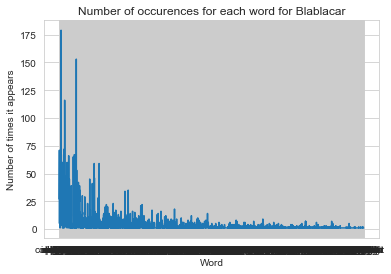

In [35]:
import matplotlib.pyplot as plt

x, y = zip(*wordBl_all)
plt.plot(x, y)
plt.title('Number of occurences for each word for Blablacar')
plt.xlabel('Word')
plt.ylabel('Number of times it appears')
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 120284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 120289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 120297 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 120276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 120287 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 120279 missing from current font.
  fon

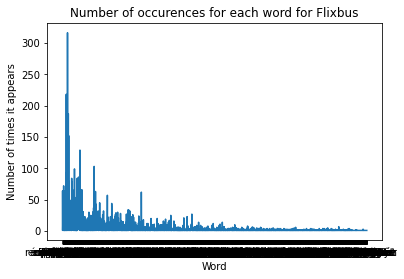

In [ ]:
x, y = zip(*wordFl_all)
plt.plot(x, y)
plt.title('Number of occurences for each word for Flixbus')
plt.xlabel('Word')
plt.ylabel('Number of times it appears')
plt.show()

Those results aren't easy to see and to interpretate, so we are going to represent only the 20 more used words per dataset :

In [36]:
wordFl = sorted(list(tkFl.word_counts.items()),key=lambda x: -x[1])[:20]
wordBl = sorted(list(tkBl.word_counts.items()),key=lambda x: -x[1])[:20]

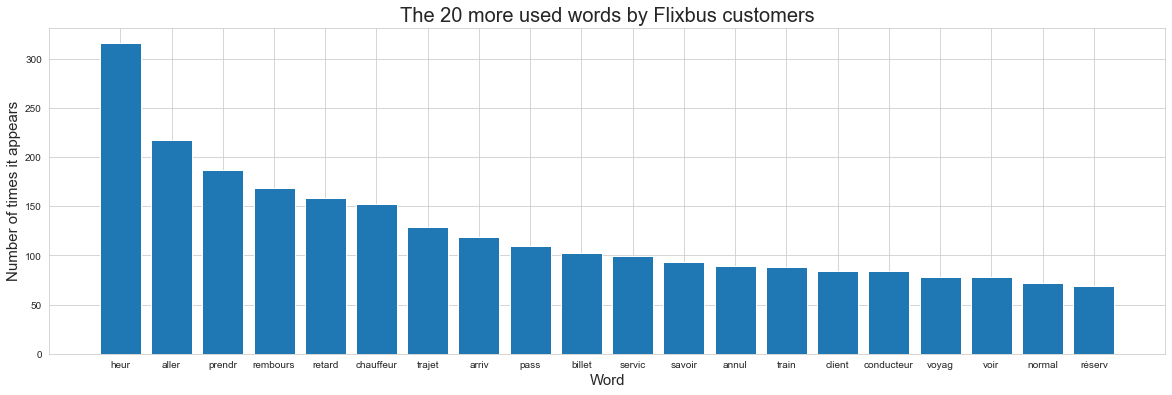

In [37]:
# more precisely let's focus on the top 20 words for each dataset
x, y = zip(*wordFl)
plt.figure(figsize=(20,6))
plt.bar(x, y)
plt.title('The 20 more used words by Flixbus customers', fontsize=20)
plt.xlabel('Word', fontsize=15)
plt.ylabel('Number of times it appears', fontsize=15)
plt.show()

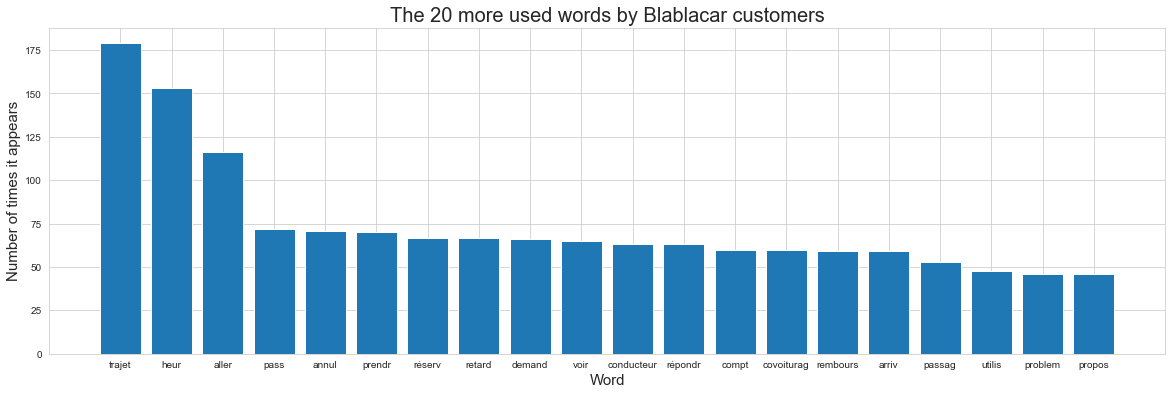

In [38]:
x, y = zip(*wordBl)
plt.figure(figsize=(20,6))
plt.bar(x, y)
plt.title('The 20 more used words by Blablacar customers', fontsize=20)
plt.xlabel('Word', fontsize=15)
plt.ylabel('Number of times it appears', fontsize=15)
plt.show()

Now, our objective is to put the wordcloud in place. The purpose is that the words which are the more used will be represents in big characters on an image.

Before that, we need to open our file of stopwords and put those stopwords in a list :

In [39]:
# we're starting to put the wordcloud in place

with open('stop_words_french.txt') as file:
    lines = file.readlines()

lines
stop_words = []
for i in lines:
  stop_words.append(i.replace('\n', ''))
print(stop_words[0:5])


['a', 'Ã\xa0', 'Ã¢', 'abord', 'afin']


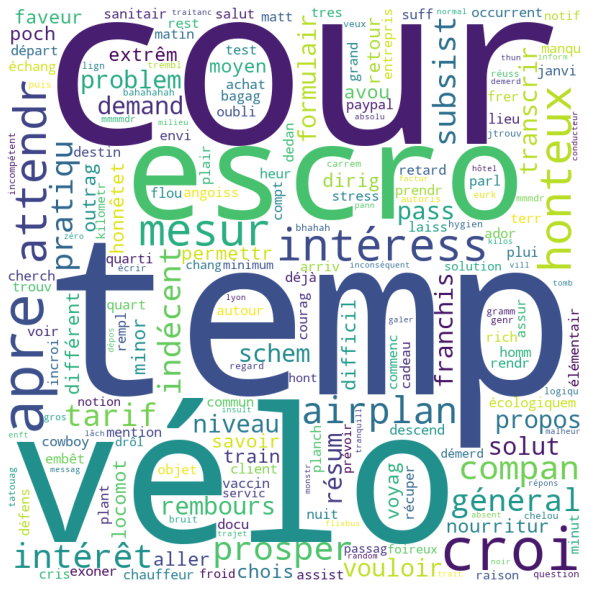

In [40]:
from wordcloud import WordCloud

# Wordcloud for Flixbus

x, y = zip(*wordFl_all) # we take the columns of wordFl_all which contains a word, and it's number of occurences
comment_words_Fl = ''
for i in x:
  comment_words_Fl += i + ' ' # we create one string with all the words of the comments of Flixbus Users

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = mots_vides, min_font_size = 10).generate(comment_words_Fl)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

We see on this graph the words most frequently used by the users of Flixbus, are among others Need, worries, swindle which are more negative than positive.

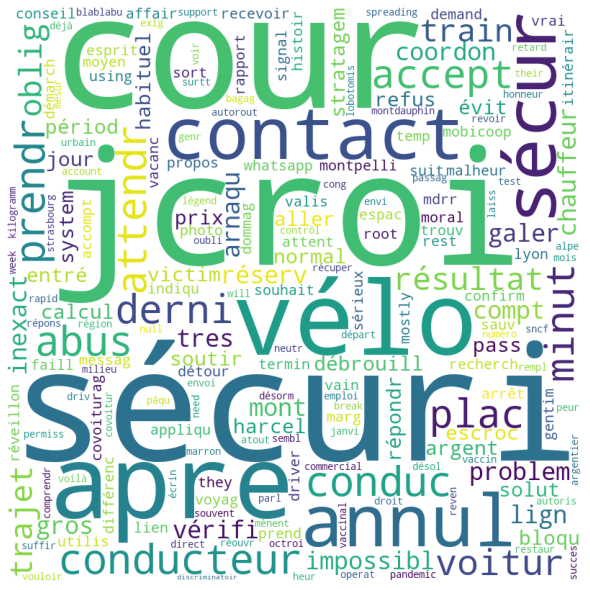

In [41]:
# Wordcloud for Blablacar

x, y = zip(*wordBl_all)
comment_words_Bl = ''
for i in x:
  comment_words_Bl += i + ' ' # we create one string with all the words of the comments of Blablacar Users

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stop_words, min_font_size = 10).generate(comment_words_Bl)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Following this cloud analysis, we can deduce 2 things :
- there are a lot of words that have no relation with the field of transport and that appear really often, so we probably need to add them to the list of stopwords ; 
- there are also some comments in english, so we need to add the english stopwords to the list of those we have for the moment.

Here we add the list of english stopwords in our stopwords list : 

In [42]:
stop_words_english = stopwords.words("english")
stop_words = stop_words + stop_words_english

Now let's delete some of the most common words that have no relation with the field of transports.

We are gonna first have a look for those which appears at least 20 times, and then with the repetition of Wordcloud, we will add each time, the words that are non-significant in the list.

In [43]:
sorted(list(tkBl.word_counts.items()),key=lambda x: -x[1])

add_stop_wordsBl = ['faire', 'bonjour', 'pouvoir', 'voir', 'falloir', 'savoir', 'passer', 'vouloir', 'mettre',
                    'message', 'trouver', 'site', 'déjà', 'nouveau', 'monde', 'pass', 'blablabu',
                    'nan', 'français', 'grand', 'hello', 'matin', 'hier', 'france', 'info', 'poche',
                    'trouve', 'ouai', 'jaurai', 'need', 'commun', 'clair', 'orléan', 'dinfo', 'pourriezvou','apre','jcroi'
                    ]

In [44]:
# same thing with Flixbus

sorted(list(tkFl.word_counts.items()),key=lambda x: -x[1])

add_stop_wordsFl = ['prendre', 'flixbu', 'pari', 'voir', 'coup', 'laisser', 'possible', 'bercy', 'lyon',
                    'quon', 'genre', 'merde', 'bande', 'soir', 'matin', 'août', 'céter', 'your', 'quil',
                    'joli', 'thank', 'jcroi', 'jaurai', 'pouvezvou', 'user', 'week', 'bruxelle',
                    'frédéric', 'anger', 'bell', 'faire', 'bonjour', 'pouvoir', 'voir', 'falloir', 'savoir', 'passer', 'vouloir', 'mettre',
                    'message', 'trouver', 'site', 'déjà', 'nouveau', 'monde', 'pass', 'blablabu',
                    'nan', 'français', 'grand', 'hello', 'matin', 'hier', 'france', 'info', 'poche',
                    'trouve', 'ouai', 'jaurai', 'need', 'commun', 'clair', 'orléan', 'dinfo', 'pourriezvou','jvou','airplane'
                    ]

 We finally add the 2 additional lists, to the big one :

In [45]:
stop_words = stop_words + add_stop_wordsBl + add_stop_wordsFl

Now, it is time to reperform the Wordcloud analysis, in order to have more practical and interpretable results than before :

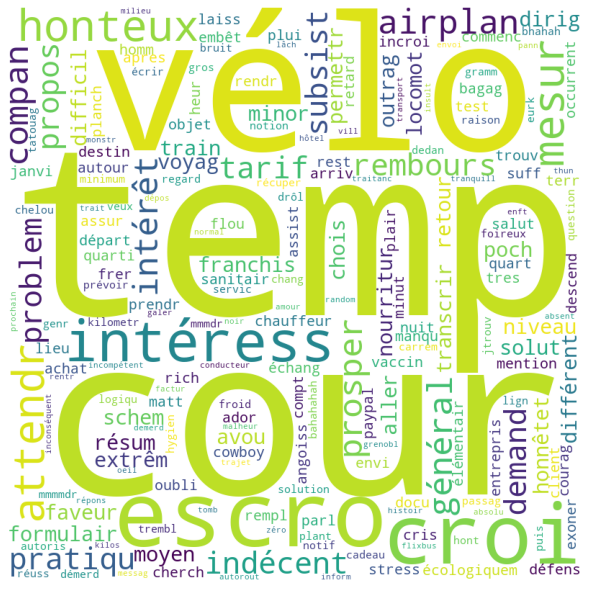

In [46]:
# Wordcloud for Flixbus

x, y = zip(*wordFl_all)
comment_words_Fl = ''
for i in x:
  comment_words_Fl += i + ' ' # we create one string with all the words of the comments of Flixbus Users

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stop_words, min_font_size = 10).generate(comment_words_Fl)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

We notice that the most frequent words are not positive (**Souci, honteux, escro,complet**) enough on the services of our company, we will see that a little further in the NLP models

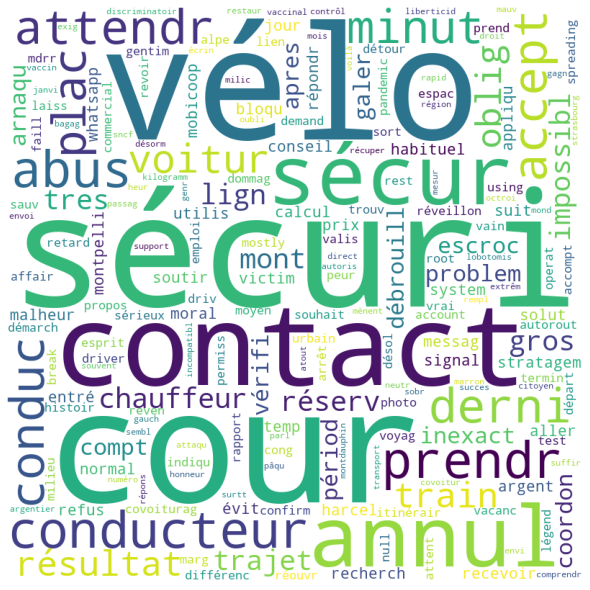

In [47]:
# Wordcloud for Blablacar

x, y = zip(*wordBl_all)
comment_words_Bl = ''
for i in x:
  comment_words_Bl += i + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stop_words, min_font_size = 10).generate(comment_words_Bl)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Now, let's analyze in which proportion our datasets are balanced or not between the negative and positive comments :

In [48]:
data_FlUser_clean=pd.read_excel('data_FlUser_clean.xlsx', index_col=0)
data_BlUser_clean=pd.read_excel('data_blUser_clean.xlsx', index_col=0)
data_FlUser_clean.label.value_counts()       

neu    910
neg    597
pos    310
Name: label, dtype: int64

**Flixbus dataset :**

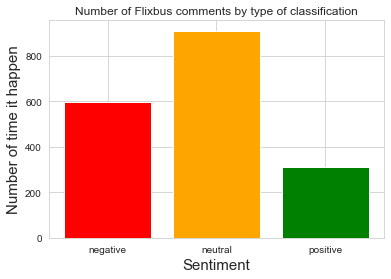

In [49]:
count = data_FlUser_clean.label.value_counts()  
plt.bar(['negative', 'neutral', 'positive'], (count[1], count[0], count[2]), color =['red', 'orange', 'green'])
# we order our plot in an increasing order in term of sentiment (negative --> neutral --> positive)
plt.title('Number of Flixbus comments by type of classification')
plt.xlabel('Sentiment', fontsize=15)
plt.ylabel('Number of time it happen', fontsize=15)
plt.show()

We see on that graphic that the positive opinions which emerge from our labeling, shows us that the proportion of positive opinions concerning our company is very low compared to the negative and neutral opinions. So we will have to improve our services

**Blablacar dataset :**

Text(0, 0.5, 'Number of time it happen')

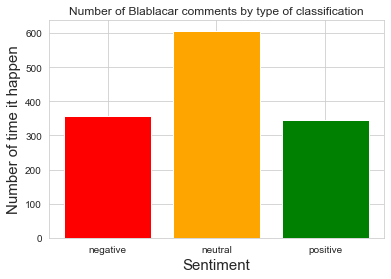

In [50]:
count = data_BlUser_clean.label.value_counts()  
plt.bar(['negative', 'neutral', 'positive'], (count[1], count[0], count[2]), color =['red', 'orange', 'green'])
plt.title('Number of Blablacar comments by type of classification')
plt.xlabel('Sentiment', fontsize=15)
plt.ylabel('Number of time it happen', fontsize=15)

To put in a nutshell, we can say that the Flixbus dataset is quite unbalanced with a lower weight of positive comments, but nothing shocking (just two times less of positive than negative).

For the Blablacar comments, there is almost the same number of positive than negative, the balance is more balanced. 

In the two cases, the neutral sentiment is the one that takeover from the two others, probably because the majority of the customers just describe their travel without complaining or praise the merits of the company.

# Sentiment model (part 2)
After the exploratory analysis of the data we got to the heart of the matter, analyzing the reactions of our uses on their tweeter page. 
For this we proceeded in two (2) steps: the classification (and prediction) of tweets according to the reactions detect, positive, neutral or negative from the spacy package, the database of tweets about our company (Flixbus). We also used artificial neural networks with the Keras package  with two hidden layers for classification and prediction of tweets.
Then we proceeded to topic modeling with the LDA method of the gensim library  on the data of our company and our competitor BlaBlaCar. In addition, we also applied the textual data clustering model.

This part is the one where we are finally gonna make, implement and evaluate our classifier for sentiment analysis. We are gonna make you a description, step by step of our way to do it.

In [51]:
import pandas as pd
import nltk
import gensim
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
#lemmatization
from nltk.stem import WordNetLemmatizer
#we charge the stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
from gensim.models import keyedvectors
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thier\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thier\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thier\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\thier\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [52]:
df=pd.read_excel('data_FlUser_clean.xlsx', index_col=0 )
df.head(5)

corpus label
1                                           intéress   pos
2  honteux attendr mesur airplan prosper compan i...   neg
3  problem propos rembours demand rembours pass f...   neg
4  franchis résum schem transcrir niveau nourritu...   pos
5                  dirig avou extrêm difficil faveur   neu

In [54]:
corpus = df['corpus'].tolist() # we take our column with comments in a form of a list
corpus_tk = [word_tokenize(doc) for doc in corpus]
lem = WordNetLemmatizer() # we define our lemmentizer
corpus_lm = [[lem.lemmatize(mot) for mot in doc] for doc in corpus_tk] # we apply our lemmentizer to all the words of the dataset
mots_vides = stopwords.words('english')

add_word=['euros', 'euro', 'peuton','êtes', "qu'", 'cest', "nest", "tweet", "tweetvou", "tweet", 'resé','quil', 'seul','résa','année','waaaaaaaaaaa','zizou','xptdrrrrrr',
          'pookie','wesh','vraiment','xptdrrrrrr','\n\n','zehma','yvan','décembre','jdbzbsbw','bayonn','était'
          ,'jamais', 'flixbu','bonjour','estce','tweeter','chose','estil','e-mail','bref','mère','pari','mail','toulouse',"qu'on",'lundi',
          'nana','mdrrr','blablacar','devoir','copain','hello',"aujourd'hui",'part', 'anger','estamo', 'blabla','nîme','show','prénom','amien','faire','tour',
          'blabl','pouvoir', 'anné','.seul','mettre', 'falloir','reser','porto','genèv','connai','update','perf','point','nouveau','tair',
          'semaine','voire','avion','coup','flixbu','jvou','lyon']
mots_vides.extend(add_word)

#suppression des mots-vides
corpus_sw = [[mot for mot in doc if not (mot in mots_vides)] for doc in corpus_lm] # we withdraw the stopwords of our list of words tokenize

In [55]:
DC_ok=pd.DataFrame({'corpus':corpus, 'label':df['label'].tolist()})
DC_ok.head()

corpus label
0                                           intéress   pos
1  honteux attendr mesur airplan prosper compan i...   neg
2  problem propos rembours demand rembours pass f...   neg
3  franchis résum schem transcrir niveau nourritu...   pos
4                  dirig avou extrêm difficil faveur   neu

We split our data set in train (80% of origin data set) and test(20% origin data set) 

In [56]:
#partition app-test
from sklearn.model_selection import train_test_split
dfTrain, dfTest = train_test_split(DC_ok,train_size=0.8,stratify=DC_ok.label,random_state=0)

#verification
print('Dimension of the train set: ',dfTrain.shape)
print('Dimension of the test set: ',dfTest.shape)

Dimension of the train set:  (1453, 2)
Dimension of the test set:  (364, 2)


In [57]:
import keras
print(keras.__version__)

2.10.0


In [58]:
#tokenization with Keras
#num_words = None => sans limitation du nombre de termes à extraire
from keras.preprocessing.text import Tokenizer
tk = Tokenizer(num_words=None)

#creation of a dictionnary from the documents
tk.fit_on_texts(dfTrain.corpus)

#number of treated documents
print(tk.document_count)

1453


In [59]:
#list of words and their frequencies
print(list(tk.word_counts.items())[:10])

[('rouen', 2), ('neig', 2), ('matin', 17), ('mainten', 4), ('franch', 12), ('fâch', 2), ('incap', 6), ('heur', 248), ('prendr', 146), ('retard', 121)]


In [60]:
print(sorted(list(tk.word_counts.items()),key=lambda x: -x[1])[:10])

[('heur', 248), ('aller', 183), ('prendr', 146), ('rembours', 134), ('chauffeur', 125), ('retard', 121), ('arriv', 100), ('trajet', 98), ('pass', 92), ('billet', 89)]


In [61]:
print(list(tk.word_index.items())[:10])

[('heur', 1), ('aller', 2), ('prendr', 3), ('rembours', 4), ('chauffeur', 5), ('retard', 6), ('arriv', 7), ('trajet', 8), ('pass', 9), ('billet', 10)]


In [62]:
#training matrix for docs terms
# choose TFIDF mod
mTrain = tk.texts_to_matrix(dfTrain.corpus, mode='tfidf')
print(mTrain.shape)

(1453, 2646)


Now that the data is ready, we are gonna create effectively the model, and first, import the needed library : 

In [63]:
from keras.models import Sequential
from keras.layers import Dense

#perceptron multicouche à 1 couche cachée
pmc = Sequential()
pmc.add(Dense(units=2,input_dim=mTrain.shape[1],activation="elu"))
pmc.add(Dense(units=1,activation="sigmoid"))

#structure du réseau
print(pmc.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 5294      
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 5,297
Trainable params: 5,297
Non-trainable params: 0
_________________________________________________________________
None


We define a polarity function, in order that there is a hierarchy between the labels (0 for negative, 1 for neutral, and 2 for positive) : 

In [64]:
def polarity(labels):
  if labels=='neg':
    return 0
  elif labels=='neu':
    return 1
  else:
    return 2
polarite=[]
for x in dfTrain.label:
  polarite.append(polarity(x))
dfTrain['polarity']=polarite # we create a new column in the dataset, with the corresponding polarity
dfTrain.head()

corpus label  polarity
1696                           rouen neig matin mainten   neu         1
118   franch fâch incap heur prendr retard monstr co...   neg         0
957   larm enfant sensibilis expliqu reprendr heur l...   neu         1
70    faill pass sanitair métro train jour vaccin em...   neg         0
2     problem propos rembours demand rembours pass f...   neg         0

We are gonna train the model on 10 differents epochs, and see which epoch gives us the best accuracy : 

In [65]:
# configuration of the training algorithm
pmc.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

# one part of the training set is reserved for the validation of the model (this is the validation set)
history = pmc.fit(mTrain,dfTrain.polarity,epochs=10,validation_split=0.2)

Epoch 1/10
37/37 [==============================] - 4s 19ms/step - loss: 0.0000e+00 - accuracy: 0.4036 - val_loss: 0.0000e+00 - val_accuracy: 0.4055
Epoch 2/10
37/37 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.4028 - val_loss: 0.0000e+00 - val_accuracy: 0.3780
Epoch 3/10
37/37 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.3795 - val_loss: 0.0000e+00 - val_accuracy: 0.3780
Epoch 4/10
37/37 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.3666 - val_loss: 0.0000e+00 - val_accuracy: 0.3643
Epoch 5/10
37/37 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.3589 - val_loss: 0.0000e+00 - val_accuracy: 0.3608
Epoch 6/10
37/37 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.3580 - val_loss: 0.0000e+00 - val_accuracy: 0.3608
Epoch 7/10
37/37 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.3528 - val_los

Here, we're gonna plot the evolution of the accuracy, for each epoch, and we see that the best accuracy is achieve for the 2nd and 3rd epoch.

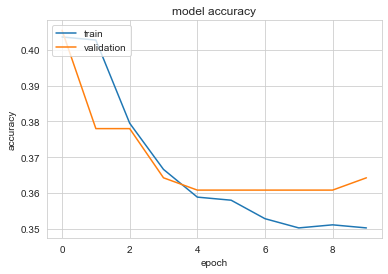

In [66]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

We see on this graph that when the value of epoch is between 0 and 5 the MSE of the validation base is higher than that of the training base of the model, which is normal. However, when the epoch value is above 5, the prediction error on the validation value is higher than the one on the training base, which is not normal. Indeed, it is not possible for the model to perform better on the base it has never seen than on the one with which the model has been trained.

**After training the model on the training data, we proceed to its application on the test base, to see in what measure it can predict the tweets**

In [67]:
#matrice documents-termes en TEST
mTest = tk.texts_to_matrix(dfTest.corpus)
print(mTest.shape)

(364, 2646)


We have now 3251 colum in our data set after transformation in matrix



**We transform now the label column to integer type**

In [69]:
polarite=[]
for x in dfTest.label:
  polarite.append(polarity(x))
dfTest['polarity']=polarite
dfTest.head()

corpus label  polarity
1210        conducteur prendr tony montan suffir minut   neu         1
842                          déjà arriv derri compliqu   neu         1
1552                          macron reprennent servic   neu         1
363   jcomprend pérégrin facil savoir comprendr moment   pos         2
362                        heur retard messag voyageur   neg         0

In [70]:
#évaluation en test avec evaluate()
print(pmc.evaluate(mTest,dfTest.polarity))

12/12 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.3297
[0.0, 0.32967033982276917]


The predictive power of our prediction model is 44% which is not very high in our case. Indeed, our base includes words in several languages, also because we have an unbalanced base (there are more negative and neutral opinions than positive)

In [71]:
#recovery of the output of the hidden layer
#calculated on the test sample
hidden = keras.backend.function([pmc.layers[0].input],[pmc.layers[0].output])
out_hidden = hidden([mTest])

#vérification of the dimension
print(out_hidden[0].shape)

(364, 2)


In [72]:
#associer ces coordonnées à la polarité
import numpy as np
dfTestHidden = pd.DataFrame(out_hidden[0],columns=['V1','V2'])
dfTestHidden['polarity'] =dfTest.label

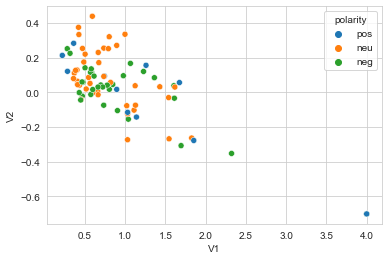

In [73]:
import seaborn as sns
sns.scatterplot(x='V1',y='V2',hue='polarity',data=dfTestHidden)
plt.show()

We see on this graph, that the more the value of the first hidden layer of our neural network, the more we see the neutral and positive opinions and see clearly that the positive opinions are not enough represented. So we have a lot of improvement of the services of our company


**We are now going to carry out the Topic modeling on the opinions of our customers as well as the customers of our competitors**

# Topic Modeling

* Gensim (LDA)
* Text Clustering

## Gensim (LDA)
### FlexBus Company

We import the needed libraries in order to do the lemmentization :

In [1]:
import nltk
import gensim
import pandas as pd

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thier\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\thier\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thier\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
dataFl=pd.read_excel('data_FlUser_clean.xlsx', index_col=0)
dataFl.head()

corpus label
1                                           intéress   pos
2  honteux attendr mesur airplan prosper compan i...   neg
3  problem propos rembours demand rembours pass f...   neg
4  franchis résum schem transcrir niveau nourritu...   pos
5                  dirig avou extrêm difficil faveur   neu

We put all the comments into a list : 

In [76]:
corpus=dataFl['corpus'].tolist()
corpus[0:2]

['intéress',
 'honteux attendr mesur airplan prosper compan intérêt général pratiqu tarif indécent subsist']

In [77]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thier\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Thanks to word_tokenise, we split each list of comments into a list of the words of the comment : 

In [6]:
from nltk.tokenize import word_tokenize
corpus_tk = [word_tokenize(doc) for doc in corpus]
print(corpus_tk[0:4])

[['contact', 'annul', 'sécur', 'conducteur', 'prendr', 'abus'], ['attendr', 'conduc', 'accept', 'attendr', 'derni', 'minut', 'plac', 'voitur', 'résultat', 'oblig', 'prendr', 'train', 'trajet'], ['impossibl', 'réserv', 'lign', 'chauffeur', 'mont', 'tres'], ['gros', 'problem', 'arnaqu', 'vérifi', 'coordon', 'compt', 'sécuri', 'trajet', 'inexact']]


In [79]:
lem = WordNetLemmatizer()
corpus_lm = [[lem.lemmatize(mot) for mot in doc] for doc in corpus_tk]
print(corpus_lm[0:4])

[['intéress'], ['honteux', 'attendr', 'mesur', 'airplan', 'prosper', 'compan', 'intérêt', 'général', 'pratiqu', 'tarif', 'indécent', 'subsist'], ['problem', 'propos', 'rembours', 'demand', 'rembours', 'pas', 'formulair', 'propos', 'vouloir', 'demand', 'rembours', 'solut', 'propos', 'rembours'], ['franchis', 'résum', 'schem', 'transcrir', 'niveau', 'nourritur', 'minor', 'permettr']]


We retake our list of stopwords : 

In [80]:
#charger les stopwords
from nltk.corpus import stopwords
mots_vides = stopwords.words('english')
mots_vides.extend(add_stop_wordsFl)

In [81]:
# deletion of empty words
corpus_sw = [[mot for mot in doc if not (mot in mots_vides)] for doc in corpus_lm]

#verification, origin
print(corpus_lm[0])

#without the stopwords
print('\n')
print(corpus_sw[0:5])

['intéress']


[['intéress'], ['honteux', 'attendr', 'mesur', 'airplan', 'prosper', 'compan', 'intérêt', 'général', 'pratiqu', 'tarif', 'indécent', 'subsist'], ['problem', 'propos', 'rembours', 'demand', 'rembours', 'pas', 'formulair', 'propos', 'demand', 'rembours', 'solut', 'propos', 'rembours'], ['franchis', 'résum', 'schem', 'transcrir', 'niveau', 'nourritur', 'minor', 'permettr'], ['dirig', 'avou', 'extrêm', 'difficil', 'faveur']]


withdrawal of the tokens of less than 3 letters : 

In [82]:
#retirer les token de moins de 3 lettres
corpus_sw = [[mot for mot in doc if len(mot) >= 3] for doc in corpus_sw]
print(corpus_sw[0:5])

[['intéress'], ['honteux', 'attendr', 'mesur', 'airplan', 'prosper', 'compan', 'intérêt', 'général', 'pratiqu', 'tarif', 'indécent', 'subsist'], ['problem', 'propos', 'rembours', 'demand', 'rembours', 'pas', 'formulair', 'propos', 'demand', 'rembours', 'solut', 'propos', 'rembours'], ['franchis', 'résum', 'schem', 'transcrir', 'niveau', 'nourritur', 'minor', 'permettr'], ['dirig', 'avou', 'extrêm', 'difficil', 'faveur']]


Construction of a dictionnary of the tokens : 

In [110]:
from gensim.corpora import Dictionary
dico = Dictionary(corpus_sw)
print(dico)

Dictionary(2870 unique tokens: ['intéress', 'airplan', 'attendr', 'compan', 'général']...)


In [84]:
#liste of the tokens and their intern number
print(dico.token2id)

{'intéress': 0, 'airplan': 1, 'attendr': 2, 'compan': 3, 'général': 4, 'honteux': 5, 'indécent': 6, 'intérêt': 7, 'mesur': 8, 'pratiqu': 9, 'prosper': 10, 'subsist': 11, 'tarif': 12, 'demand': 13, 'formulair': 14, 'pas': 15, 'problem': 16, 'propos': 17, 'rembours': 18, 'solut': 19, 'franchis': 20, 'minor': 21, 'niveau': 22, 'nourritur': 23, 'permettr': 24, 'résum': 25, 'schem': 26, 'transcrir': 27, 'avou': 28, 'difficil': 29, 'dirig': 30, 'extrêm': 31, 'faveur': 32, 'chois': 33, 'honnêtet': 34, 'locomot': 35, 'moyen': 36, 'cour': 37, 'différent': 38, 'poch': 39, 'temp': 40, 'aller': 41, 'outrag': 42, 'retour': 43, 'rich': 44, 'train': 45, 'voyag': 46, 'écologiquem': 47, 'ador': 48, 'assur': 49, 'bagag': 50, 'flou': 51, 'frer': 52, 'heur': 53, 'incroi': 54, 'mention': 55, 'nuit': 56, 'quart': 57, 'retard': 58, 'janvi': 59, 'sanitair': 60, 'suff': 61, 'test': 62, 'vaccin': 63, 'autour': 64, 'chauffeur': 65, 'cowboy': 66, 'défens': 67, 'homm': 68, 'laiss': 69, 'prendr': 70, 'rest': 71, 'a

In [111]:
#representation bag of words of the documents
corpus_bow = [dico.doc2bow(doc) for doc in corpus_sw]

#verification
print(sorted(corpus_sw[1]))

print('\n')
print(corpus_bow[1])

['airplan', 'attendr', 'compan', 'général', 'honteux', 'indécent', 'intérêt', 'mesur', 'pratiqu', 'prosper', 'subsist', 'tarif']


[(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


**LDA (Latent Dirichlet Allocation)**

In [112]:
from gensim.models import LdaModel
lda = LdaModel(corpus=corpus_bow,id2word=dico,num_topics=5,alpha=10)

We print the topics that we defined during the topic modeling

In [87]:
lda.print_topics()

[(0,
  '0.018*"heur" + 0.015*"prendr" + 0.013*"aller" + 0.013*"rembours" + 0.011*"retard" + 0.011*"chauffeur" + 0.009*"arriv" + 0.008*"trajet" + 0.008*"servic" + 0.007*"pas"'),
 (1,
  '0.021*"heur" + 0.015*"aller" + 0.011*"prendr" + 0.010*"retard" + 0.010*"rembours" + 0.009*"chauffeur" + 0.008*"billet" + 0.007*"arriv" + 0.007*"trajet" + 0.007*"client"'),
 (2,
  '0.024*"heur" + 0.016*"aller" + 0.014*"rembours" + 0.013*"prendr" + 0.010*"retard" + 0.009*"chauffeur" + 0.009*"arriv" + 0.009*"trajet" + 0.008*"servic" + 0.007*"pas"'),
 (3,
  '0.021*"heur" + 0.016*"aller" + 0.014*"prendr" + 0.012*"retard" + 0.010*"chauffeur" + 0.009*"rembours" + 0.009*"trajet" + 0.008*"pas" + 0.008*"arriv" + 0.008*"billet"'),
 (4,
  '0.020*"heur" + 0.013*"aller" + 0.011*"chauffeur" + 0.010*"trajet" + 0.009*"prendr" + 0.009*"retard" + 0.009*"rembours" + 0.007*"pas" + 0.006*"voyag" + 0.006*"arriv"')]

In [88]:
#details for the first topic
lda.show_topic(0)

[('heur', 0.018258223),
 ('prendr', 0.014881263),
 ('aller', 0.013370705),
 ('rembours', 0.013366767),
 ('retard', 0.0113627),
 ('chauffeur', 0.010725829),
 ('arriv', 0.008588649),
 ('trajet', 0.007618522),
 ('servic', 0.0076155937),
 ('pas', 0.0074724536)]

In [89]:
#description of the documents in the space of topics
doc_topics = lda.get_document_topics(corpus_bow)
print(doc_topics)

In [90]:
#transformation in matrix "sparse"
from gensim.matutils import corpus2csc
mat_sparse = corpus2csc(doc_topics)

#verification
print(mat_sparse[0])

  (0, 0)	0.19888177514076233
  (0, 1)	0.2024904042482376
  (0, 2)	0.19973967969417572
  (0, 3)	0.2016589492559433
  (0, 4)	0.19986961781978607
  (0, 5)	0.20184752345085144
  (0, 6)	0.1990073174238205
  (0, 7)	0.19899415969848633
  (0, 8)	0.19728565216064453
  (0, 9)	0.1985260397195816
  (0, 10)	0.19967925548553467
  (0, 11)	0.19872896373271942
  (0, 12)	0.20364803075790405
  (0, 13)	0.2005862146615982
  (0, 14)	0.20105673372745514
  (0, 15)	0.19851429760456085
  (0, 16)	0.1994914412498474
  (0, 17)	0.19830770790576935
  (0, 18)	0.20080068707466125
  (0, 19)	0.20036722719669342
  (0, 20)	0.1985369175672531
  (0, 21)	0.19982624053955078
  (0, 22)	0.19938957691192627
  (0, 23)	0.20052064955234528
  (0, 24)	0.20302750170230865
  :	:
  (0, 1792)	0.19558846950531006
  (0, 1793)	0.20486202836036682
  (0, 1794)	0.2029508650302887
  (0, 1795)	0.19689010083675385
  (0, 1796)	0.19808068871498108
  (0, 1797)	0.20027688145637512
  (0, 1798)	0.19999834895133972
  (0, 1799)	0.2015475630760193
  (0, 1

In [91]:
#et en matrice "normale"
mat_dt = mat_sparse.T.toarray()
print(mat_dt)

[[0.19888178 0.20021617 0.2010801  0.2002185  0.19960347]
 [0.2024904  0.19605021 0.20395088 0.20161666 0.19589187]
 [0.19973968 0.1995883  0.20709552 0.19921045 0.19436604]
 ...
 [0.20043553 0.19988157 0.19959363 0.19915555 0.20093368]
 [0.20172213 0.1993732  0.19972996 0.2008104  0.1983643 ]
 [0.20135215 0.19962224 0.20084408 0.19936006 0.19882149]]


In [92]:
#verification of the dimensions
print(mat_dt.shape)

(1817, 5)


We made a reduction of dimensionality, and we keep only 5 of them

In [93]:
dfTopic = pd.DataFrame(mat_dt,columns=["T"+str(i) for i in range(mat_dt.shape[1])])
dfTopic['polarite'] = dataFl.label

#vérif.
print(dfTopic.head())

         T0        T1        T2        T3        T4 polarite
0  0.198882  0.200216  0.201080  0.200218  0.199603      NaN
1  0.202490  0.196050  0.203951  0.201617  0.195892      pos
2  0.199740  0.199588  0.207096  0.199210  0.194366      neg
3  0.201659  0.201756  0.196817  0.198645  0.201123      neg
4  0.199870  0.201638  0.196315  0.201114  0.201063      pos


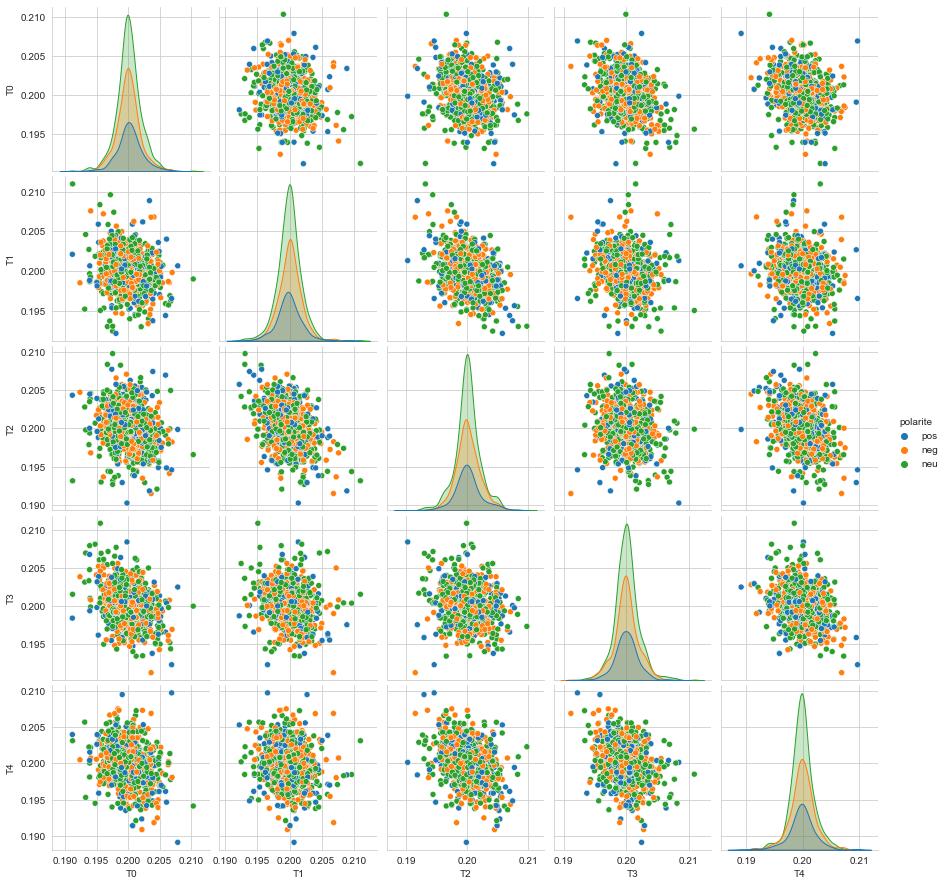

In [94]:
#graphique "pairplot"
import seaborn as sns
sns.pairplot(dfTopic,hue='polarite')
plt.show()

In [113]:
dictionary = dico
#dictionary.filter_extremes( no_above=0.1, keep_n=10)
bow_corpus=corpus_bow
lda_model = LdaModel(corpus=corpus_bow,id2word=dictionary,num_topics=10,alpha=10)


In [114]:
topics = []
for idx, topic in lda_model.print_topics(-1) :
    print("Topic: {} -> Words: {}".format(idx, topic))
    topics.append(topic)

Topic: 0 -> Words: 0.019*"heur" + 0.015*"aller" + 0.012*"rembours" + 0.011*"chauffeur" + 0.010*"prendr" + 0.009*"retard" + 0.008*"servic" + 0.007*"pas" + 0.007*"client" + 0.007*"trajet"
Topic: 1 -> Words: 0.023*"heur" + 0.016*"aller" + 0.013*"rembours" + 0.013*"chauffeur" + 0.012*"prendr" + 0.010*"retard" + 0.009*"trajet" + 0.008*"arriv" + 0.008*"servic" + 0.007*"billet"
Topic: 2 -> Words: 0.020*"heur" + 0.014*"aller" + 0.013*"prendr" + 0.010*"retard" + 0.009*"trajet" + 0.009*"arriv" + 0.009*"rembours" + 0.009*"chauffeur" + 0.009*"pas" + 0.007*"normal"
Topic: 3 -> Words: 0.020*"heur" + 0.015*"aller" + 0.015*"retard" + 0.013*"prendr" + 0.010*"chauffeur" + 0.010*"rembours" + 0.008*"arriv" + 0.007*"trajet" + 0.007*"billet" + 0.007*"pas"
Topic: 4 -> Words: 0.024*"heur" + 0.014*"aller" + 0.013*"prendr" + 0.011*"retard" + 0.010*"rembours" + 0.010*"chauffeur" + 0.008*"trajet" + 0.008*"pas" + 0.007*"servic" + 0.007*"annul"
Topic: 5 -> Words: 0.019*"heur" + 0.013*"prendr" + 0.012*"aller" + 0.01

In [115]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models import CoherenceModel
processed_docs=corpus_sw
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary)
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.20536292976043202


In [116]:
# stockage des resultat
all_topic_model = []
for i in range(len(topics)):
  str = topics[i].split(' + ')
  topic_model = []
  for j in range(10):
    weight = str[j][0:5]
    word = str[j][7:len(str[j])-1]
    topic_model.append((weight, word))
  all_topic_model.append(topic_model)

df_topic_model = pd.DataFrame(all_topic_model)
df_topic_model.rename(index = {0: "Topic 1", 1: "Topic 2", 2: "Topic 3", 3: "Topic 4", 4: "Topic 5", 5: "Topic 6", 6: "Topic 7", 7: "Topic 8", 8: "Topic 9", 9: "Topic 10"})

0                  1                  2  \
Topic 1   (0.019, heur)     (0.015, aller)  (0.012, rembours)   
Topic 2   (0.023, heur)     (0.016, aller)  (0.013, rembours)   
Topic 3   (0.020, heur)     (0.014, aller)    (0.013, prendr)   
Topic 4   (0.020, heur)     (0.015, aller)    (0.015, retard)   
Topic 5   (0.024, heur)     (0.014, aller)    (0.013, prendr)   
Topic 6   (0.019, heur)    (0.013, prendr)     (0.012, aller)   
Topic 7   (0.025, heur)     (0.017, aller)    (0.015, prendr)   
Topic 8   (0.020, heur)  (0.013, rembours)    (0.012, prendr)   
Topic 9   (0.020, heur)     (0.016, aller)  (0.012, rembours)   
Topic 10  (0.020, heur)     (0.014, aller)  (0.013, rembours)   

                           3                   4                   5  \
Topic 1   (0.011, chauffeur)     (0.010, prendr)     (0.009, retard)   
Topic 2   (0.013, chauffeur)     (0.012, prendr)     (0.010, retard)   
Topic 3      (0.010, retard)     (0.009, trajet)      (0.009, arriv)   
Topic 4      (0.013, prendr)  (0.010, chauffeur)   (0.010, rembours)   
Topic 5      (0.011, retard)   (0.010, rembours)  (0.010, chauffeur)   
Topic 6      (0.011, retard)  (0.011, chauffeur)   (0.010, rembours)   
Topic 7    (0.010, rembours)     (0.010, retard)  (0.010, chauffeur)   
Topic 8       (0.012, arriv)      (0.011, aller)     (0.011, retard)   
Topic 9      (0.011, prendr)     (0.011, billet)     (0.011, trajet)   
Topic 10     (0.012, prendr)     (0.011, retard)  (0.010, chauffeur)   

                           6                   7                8  \
Topic 1      (0.008, servic)        (0.007, pas)  (0.007, client)   
Topic 2      (0.009, trajet)      (0.008, arriv)  (0.008, servic)   
Topic 3    (0.009, rembours)  (0.009, chauffeur)     (0.009, pas)   
Topic 4       (0.008, arriv)     (0.007, trajet)  (0.007, billet)   
Topic 5      (0.008, trajet)        (0.008, pas)  (0.007, servic)   
Topic 6      (0.010, trajet)     (0.008, billet)   (0.007, train)   
Topic 7         (0.009, pas)      (0.009, arriv)  (0.009, trajet)   
Topic 8   (0.010, chauffeur)     (0.008, trajet)  (0.007, billet)   
Topic 9   (0.009, chauffeur)     (0.008, retard)   (0.008, arriv)   
Topic 10      (0.008, arriv)     (0.007, trajet)     (0.007, pas)   

                        9  
Topic 1   (0.007, trajet)  
Topic 2   (0.007, billet)  
Topic 3   (0.007, normal)  
Topic 4      (0.007, pas)  
Topic 5    (0.007, annul)  
Topic 6      (0.007, pas)  
Topic 7   (0.006, client)  
Topic 8    (0.007, train)  
Topic 9   (0.007, servic)  
Topic 10  (0.007, servic)

In [117]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)

C:\Users\thier\anaconda\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.001209  0.001847       1        1  10.007377
7     -0.002402 -0.001154       2        1  10.005403
8     -0.001086 -0.001048       3        1  10.003054
1      0.000792 -0.000192       4        1  10.001684
3     -0.000135  0.000587       5        1   9.999379
9     -0.000404  0.001024       6        1   9.999136
4      0.001600  0.001249       7        1   9.997452
6      0.002006 -0.001673       8        1   9.995945
0      0.000659  0.000913       9        1   9.995910
2      0.000178 -0.001552      10        1   9.994659, topic_info=       Term        Freq       Total Category  logprob  loglift
326  billet   84.000000   84.000000  Default  30.0000  30.0000
73    arriv   97.000000   97.000000  Default  29.0000  29.0000
13   demand   51.000000   51.000000  Default  28.0000  28.0000
58   retard  128.000000  128.000000  Default  27.0000  27.0000
272   arrêt   47.000000   47.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
104   apres    5.146910   52.705333  Topic10  -5.4759  -0.0232
276  réserv    5.295634   56.731794  Topic10  -5.4474  -0.0683
126  servic    6.478295   81.087502  Topic10  -5.2459  -0.2240
40     temp    4.430158   42.961895  Topic10  -5.6259   0.0312
147    lign    4.477654   47.037376  Topic10  -5.6152  -0.0487

[701 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1449     10  0.246658    .....
862       1  0.112133  abandon
862       2  0.112133  abandon
862       3  0.112133  abandon
862       4  0.112133  abandon
...     ...       ...      ...
649       6  0.088070     évit
649       7  0.132106     évit
649       8  0.132106     évit
649       9  0.132106     évit
649      10  0.132106     évit

[2118 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 8, 9, 2, 4, 10, 5, 7, 1, 3])

### Blablacar Company

In [2]:
dataBl=pd.read_excel('data_blUser_clean.xlsx', index_col=0)
dataBl.head()

corpus label
1         contact annul sécur conducteur prendr abus   neg
3  attendr conduc accept attendr derni minut plac...   pos
4          impossibl réserv lign chauffeur mont tres   neu
5  gros problem arnaqu vérifi coordon compt sécur...   neg
6                                              galer   neu

In [3]:
corpus=dataBl['corpus'].tolist()
corpus[0:2]

['contact annul sécur conducteur prendr abus',
 'attendr conduc accept attendr derni minut plac voitur résultat oblig prendr train trajet']

In [20]:
corpus_tk = [word_tokenize(doc) for doc in corpus]
print(corpus_tk[0:4])

[['contact', 'annul', 'sécur', 'conducteur', 'prendr', 'abus'], ['attendr', 'conduc', 'accept', 'attendr', 'derni', 'minut', 'plac', 'voitur', 'résultat', 'oblig', 'prendr', 'train', 'trajet'], ['impossibl', 'réserv', 'lign', 'chauffeur', 'mont', 'tres'], ['gros', 'problem', 'arnaqu', 'vérifi', 'coordon', 'compt', 'sécuri', 'trajet', 'inexact']]


In [21]:
lem = WordNetLemmatizer()
corpus_lm = [[lem.lemmatize(mot) for mot in doc] for doc in corpus_tk]
print(corpus_lm[0:4])

[['contact', 'annul', 'sécur', 'conducteur', 'prendr', 'abus'], ['attendr', 'conduc', 'accept', 'attendr', 'derni', 'minut', 'plac', 'voitur', 'résultat', 'oblig', 'prendr', 'train', 'trajet'], ['impossibl', 'réserv', 'lign', 'chauffeur', 'mont', 'tres'], ['gros', 'problem', 'arnaqu', 'vérifi', 'coordon', 'compt', 'sécuri', 'trajet', 'inexact']]


In [22]:
#deletion of the empty words
corpus_sw = [[mot for mot in doc if not (mot in mots_vides)] for doc in corpus_lm]

#verification - origin
print(corpus_lm[0])

#without the stopwords
print('\n')
print(corpus_sw[0:5])

['contact', 'annul', 'sécur', 'conducteur', 'prendr', 'abus']


[['contact', 'annul', 'sécur', 'conducteur', 'prendr', 'abus'], ['attendr', 'conduc', 'accept', 'attendr', 'derni', 'minut', 'plac', 'voitur', 'résultat', 'oblig', 'prendr', 'train', 'trajet'], ['impossibl', 'réserv', 'lign', 'chauffeur', 'mont', 'tres'], ['gros', 'problem', 'arnaqu', 'vérifi', 'coordon', 'compt', 'sécuri', 'trajet', 'inexact'], ['galer']]


In [23]:
#withdrawal of the tokens of less than 3 characters
corpus_sw = [[mot for mot in doc if len(mot) >= 3] for doc in corpus_sw]
print(corpus_sw[0:5])

[['contact', 'annul', 'sécur', 'conducteur', 'prendr', 'abus'], ['attendr', 'conduc', 'accept', 'attendr', 'derni', 'minut', 'plac', 'voitur', 'résultat', 'oblig', 'prendr', 'train', 'trajet'], ['impossibl', 'réserv', 'lign', 'chauffeur', 'mont', 'tres'], ['gros', 'problem', 'arnaqu', 'vérifi', 'coordon', 'compt', 'sécuri', 'trajet', 'inexact'], ['galer']]


In [24]:
#construction of a dictionnary of the tokens
from gensim.corpora import Dictionary
dico = Dictionary(corpus_sw)
print(dico)

Dictionary(2703 unique tokens: ['abus', 'annul', 'conducteur', 'contact', 'prendr']...)


In [25]:
#list of the tokens and their index
print(dico.token2id)

{'abus': 0, 'annul': 1, 'conducteur': 2, 'contact': 3, 'prendr': 4, 'sécur': 5, 'accept': 6, 'attendr': 7, 'conduc': 8, 'derni': 9, 'minut': 10, 'oblig': 11, 'plac': 12, 'résultat': 13, 'train': 14, 'trajet': 15, 'voitur': 16, 'chauffeur': 17, 'impossibl': 18, 'lign': 19, 'mont': 20, 'réserv': 21, 'tres': 22, 'arnaqu': 23, 'compt': 24, 'coordon': 25, 'gros': 26, 'inexact': 27, 'problem': 28, 'sécuri': 29, 'vérifi': 30, 'galer': 31, 'apres': 32, 'débrouill': 33, 'argent': 34, 'escroc': 35, 'périod': 36, 'soutir': 37, 'stratagem': 38, 'victim': 39, 'évit': 40, 'calcul': 41, 'habituel': 42, 'normal': 43, 'prix': 44, 'system': 45, 'solut': 46, 'aller': 47, 'bloqu': 48, 'entré': 49, 'harcel': 50, 'jour': 51, 'montpelli': 52, 'refus': 53, 'répondr': 54, 'appliqu': 55, 'lyon': 56, 'malheur': 57, 'messag': 58, 'recevoir': 59, 'signal': 60, 'suit': 61, 'temp': 62, 'whatsapp': 63, 'conseil': 64, 'covoiturag': 65, 'esprit': 66, 'mobicoop': 67, 'moral': 68, 'recherch': 69, 'utilis': 70, 'vrai': 71

In [26]:
#representation bag of words des documents
corpus_bow = [dico.doc2bow(doc) for doc in corpus_sw]

#verification
print(sorted(corpus_sw[1]))

#et en bow
print('\n')
print(corpus_bow[1])

['accept', 'attendr', 'attendr', 'conduc', 'derni', 'minut', 'oblig', 'plac', 'prendr', 'résultat', 'train', 'trajet', 'voitur']


[(4, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]


In [27]:
#LDA
from gensim.models import LdaModel
lda = LdaModel(corpus=corpus_bow,id2word=dico,num_topics=5,alpha=10)

In [28]:
#we print the list of topics
lda.print_topics()

[(0,
  '0.015*"trajet" + 0.012*"heur" + 0.011*"aller" + 0.007*"voir" + 0.007*"retard" + 0.006*"covoiturag" + 0.006*"conducteur" + 0.005*"demand" + 0.005*"prendr" + 0.005*"réserv"'),
 (1,
  '0.012*"trajet" + 0.010*"heur" + 0.009*"aller" + 0.006*"annul" + 0.006*"compt" + 0.006*"retard" + 0.006*"réserv" + 0.006*"demand" + 0.006*"covoiturag" + 0.005*"tres"'),
 (2,
  '0.016*"trajet" + 0.012*"heur" + 0.011*"aller" + 0.007*"compt" + 0.005*"demand" + 0.005*"annul" + 0.005*"arriv" + 0.005*"prendr" + 0.005*"répondr" + 0.005*"voir"'),
 (3,
  '0.016*"heur" + 0.015*"trajet" + 0.009*"aller" + 0.008*"réserv" + 0.007*"annul" + 0.007*"prendr" + 0.007*"demand" + 0.006*"voir" + 0.006*"conducteur" + 0.006*"retard"'),
 (4,
  '0.016*"trajet" + 0.013*"heur" + 0.009*"aller" + 0.007*"prendr" + 0.007*"annul" + 0.006*"répondr" + 0.006*"rembours" + 0.006*"conducteur" + 0.005*"passag" + 0.005*"covoiturag"')]

In [29]:
#detail for the first topic
# frequency of the most common words between all the words
lda.show_topic(0)

[('trajet', 0.014901552),
 ('heur', 0.011678371),
 ('aller', 0.010561109),
 ('voir', 0.006679414),
 ('retard', 0.006631439),
 ('covoiturag', 0.0055788057),
 ('conducteur', 0.0055489596),
 ('demand', 0.005476707),
 ('prendr', 0.0051538246),
 ('réserv', 0.0051235603)]

In [30]:
#description of the documents in the space of topics
doc_topics = lda.get_document_topics(corpus_bow)
print(doc_topics)

In [31]:
#transformation into "sparse" matrix
from gensim.matutils import corpus2csc
mat_sparse = corpus2csc(doc_topics)

print(mat_sparse)

  (0, 0)	0.19608061015605927
  (1, 0)	0.1986217051744461
  (2, 0)	0.2010178118944168
  (3, 0)	0.2027132660150528
  (4, 0)	0.20156662166118622
  (0, 1)	0.199845552444458
  (1, 1)	0.19832460582256317
  (2, 1)	0.20725560188293457
  (3, 1)	0.19802150130271912
  (4, 1)	0.19655276834964752
  (0, 2)	0.19911234080791473
  (1, 2)	0.20537449419498444
  (2, 2)	0.19902266561985016
  (3, 2)	0.1968413144350052
  (4, 2)	0.19964922964572906
  (0, 3)	0.2008315920829773
  (1, 3)	0.20230962336063385
  (2, 3)	0.20106421411037445
  (3, 3)	0.19993171095848083
  (4, 3)	0.19586284458637238
  (0, 4)	0.20104220509529114
  (1, 4)	0.20028595626354218
  (2, 4)	0.1996486634016037
  (3, 4)	0.19982315599918365
  (4, 4)	0.19920000433921814
  :	:
  (0, 1302)	0.19829727709293365
  (1, 1302)	0.2000231146812439
  (2, 1302)	0.1982962191104889
  (3, 1302)	0.20237906277179718
  (4, 1302)	0.201004296541214
  (0, 1303)	0.2010059356689453
  (1, 1303)	0.20078805088996887
  (2, 1303)	0.2007826864719391
  (3, 1303)	0.1993601769208

This allows us to take the frequency of each topic per lines. For instance, the first line will take the first topic in 20.17% of the cases. Following this, we have the classic form, with the frequencies between brackets for each comment.

In [32]:
mat_dt = mat_sparse.T.toarray()
print(mat_dt)

[[0.19608061 0.19862171 0.20101781 0.20271327 0.20156662]
 [0.19984555 0.19832461 0.2072556  0.1980215  0.19655277]
 [0.19911234 0.20537449 0.19902267 0.19684131 0.19964923]
 ...
 [0.1990018  0.20068675 0.20029117 0.19878663 0.20123363]
 [0.19887906 0.20126396 0.19985615 0.20051567 0.19948517]
 [0.19909714 0.20142697 0.19968762 0.20013988 0.19964841]]


In [133]:
dfTopic = pd.DataFrame(mat_dt,columns=["T"+str(i) for i in range(mat_dt.shape[1])])
dfTopic['polarite'] = dataBl.label

#vérif.
print(dfTopic.head())

TypeError: 'list' object is not callable

C:\Users\thier\anaconda\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):
C:\Users\thier\anaconda\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


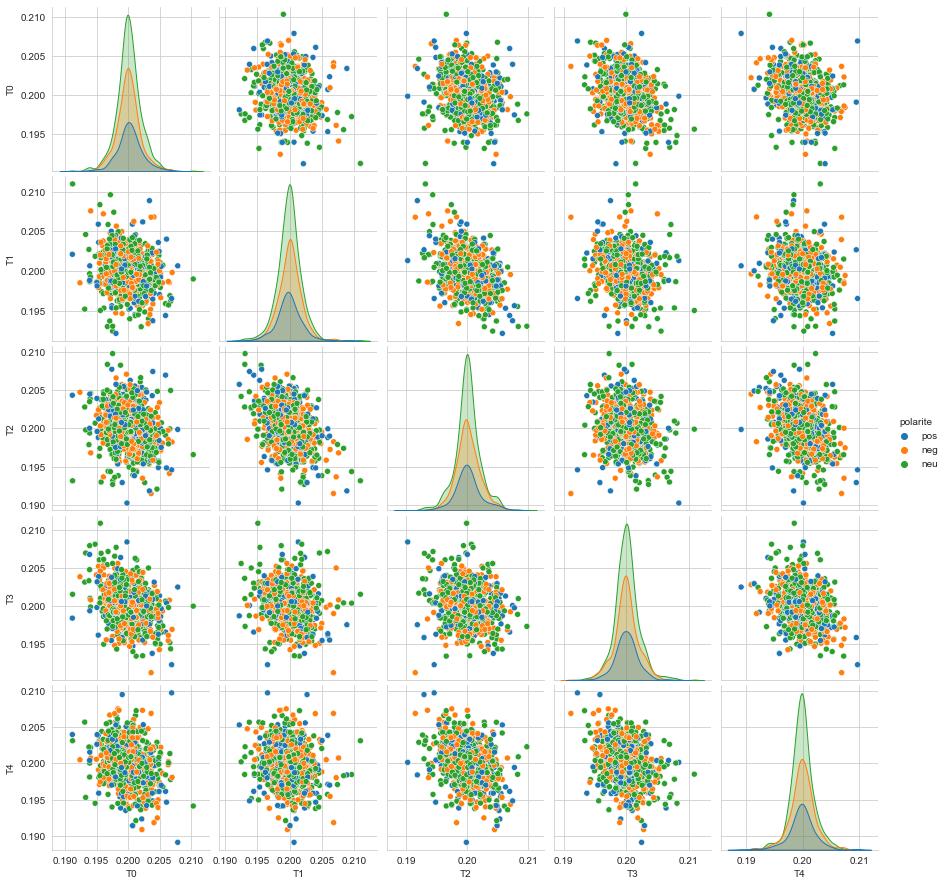

In [134]:
#graphic "pairplot"
import seaborn as sns
sns.pairplot(dfTopic,hue='polarite')

For both companies together,We see on this graph that on all four dimensions the cloud is more concentrated in the center.
We can also see on the distribution that the curves of the neutral and negative polarities are more pointed and higher than the one of the positive polarity.


However, we can still see that the positive polarity in the opinions of blablacar users is more accentuated than those of our company. So we have to improve our services to attract our customers.

**We are now going to move on to clustering, to see how the reviews of our users are grouped**

In [35]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda, corpus_bow, dico)

C:\Users\thier\anaconda\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.002322  0.001305       1        1  20.005672
0      0.000699 -0.001900       2        1  20.003989
2      0.000279 -0.000542       3        1  20.002638
4     -0.001533  0.001969       4        1  19.994385
1     -0.001767 -0.000832       5        1  19.993315, topic_info=       Term        Freq       Total Category  logprob  loglift
150    heur  119.000000  119.000000  Default  30.0000  30.0000
22     tres   32.000000   32.000000  Default  29.0000  29.0000
24    compt   47.000000   47.000000  Default  28.0000  28.0000
21   réserv   52.000000   52.000000  Default  27.0000  27.0000
15   trajet  139.000000  139.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
124    voir    9.021972   51.190480   Topic5  -5.3331  -0.1261
4    prendr    9.450271   55.043770   Topic5  -5.2867  -0.1523
314  savoir    7.190846   36.434209   Topic5  -5.5599  -0.0129
355   arriv    8.122488   46.524613   Topic5  -5.4381  -0.1356
76   propos    7.003468   36.445218   Topic5  -5.5863  -0.0396

[369 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
284       1  0.214897   ....
284       2  0.214897   ....
284       3  0.214897   ....
284       4  0.143264   ....
284       5  0.143264   ....
...     ...       ...    ...
1105      2  0.184195   with
1105      3  0.184195   with
1105      4  0.184195   with
1105      5  0.184195   with
2252      3  0.429652  étoil

[954 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 5, 2])

# Text Clustering Method

In [ ]:
!apt-get install -y tensorflow_hub 
!pip install tensorflow-text

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package tensorflow_hub
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import pandas as pd 
import numpy as np #numerical
import re #for regular expressions
import os #operational system (just in case)
import tensorflow as tf 
import tensorflow_hub as hub
import tensorflow_text

C:\Users\thier\anaconda\lib\site-packages\tensorflow_hub\__init__.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <
C:\Users\thier\anaconda\lib\site-packages\tensorflow_hub\__init__.py:75: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  distutils.version.LooseVersion(required_tensorflow_version)):


In [38]:
from bs4 import BeautifulSoup #to remove web characters
import emoji #to clean emojis
import demoji #to clean emojis
from tqdm.notebook import tqdm #progress bar
import pickle #to save serialized data
from sklearn.decomposition import PCA #PCA
from sklearn.cluster import KMeans, DBSCAN #clustering methods
demoji.download_codes()


C:\Users\thier\AppData\Local\Temp\ipykernel_14716\1360303138.py:8: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [39]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual/3")


In [40]:
import spacy
!python -m spacy download fr_core_news_sm
nlp = spacy.load("fr_core_news_sm")

2022-12-16 13:43:17.702001: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-12-16 13:43:17.702064: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-16 13:43:24.895398: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-12-16 13:43:24.895436: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-16 13:43:24.903801: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: LAPTOP-I25K00QE
2022-12-16 13:43:24.903940: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: LAPTOP-I25K00QE


[+] Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


Let's define a function that allows us to vectorize a string chain into a list of number (like when we work with base 16 in programming)

In [41]:
def use_vectorize(texts, chunk_size=1000) -> np.ndarray:
        embedder = embed
        #hub.load('https://tfhub.dev/google/universal-sentence-encoder-multilingual/3') # load the result of the handle
        if len(texts) <= chunk_size: # always the case with Tweets
            return embedder(texts).numpy().astype(np.float16)
            #return embedder(texts).numpy()
        res = []
        for i in tqdm(range(0, len(texts), chunk_size), total=round(len(texts)/chunk_size), desc="Vectorization"):
            cu_texts = texts[i:i+chunk_size]
            res.append(embedder(cu_texts).numpy().astype(np.float16))
        return np.concatenate(res)

Here, we put the vectorized text into a list

In [67]:
embeddings = use_vectorize(dataFl['corpus'].astype(str).tolist())
pickle_out = open("embeddings.p","wb")
pickle.dump(embeddings, pickle_out)
pickle_out.close()

Vectorization:   0%|          | 0/2 [00:01<?, ?it/s]

With the vectorization, all the comments are transformed into multiple subdivisions. There is so many of them that we need to perform an algorithm of reduction of dimensionality. Let's do it with PCA (Principal Components Analysis) method.

In [45]:
def pca(message_embeddings):
    pca = PCA(n_components = 50) # we limit the number of components to 50
    newX = pca.fit_transform(message_embeddings) # we fit on the embedded messages
    newdf = pd.DataFrame(newX)
    newdf.to_pickle('pca.p')
    return (newdf)

In [76]:
df_embed = pca(embeddings)
df_embed

0         1         2         3         4         5         6   \
0     0.525171 -0.195238  0.296635  0.084412  0.175628 -0.021360  0.043166   
1    -0.283203 -0.044302  0.073967  0.020385  0.026559 -0.062648 -0.053286   
2    -0.239862  0.248195  0.479576  0.175449  0.106127  0.105418 -0.030397   
3    -0.183141  0.014412 -0.051777 -0.102651  0.173423 -0.028434 -0.223609   
4     0.023461  0.191093 -0.136323 -0.269098  0.120144  0.038111  0.055073   
...        ...       ...       ...       ...       ...       ...       ...   
1812 -0.290927 -0.043767 -0.080914 -0.063285 -0.081050 -0.059928  0.167947   
1813  0.514091 -0.175010  0.119496  0.006011  0.037432  0.112618 -0.086993   
1814  0.514091 -0.175010  0.119496  0.006011  0.037432  0.112618 -0.086993   
1815  0.411893  0.031977 -0.103125 -0.080765  0.058234  0.021270  0.021013   
1816  0.357923 -0.137784  0.246265  0.061547  0.154625  0.057112  0.154139   

            7         8         9   ...        40        41        42  \
0     0.078440  0.026443  0.004546  ...  0.048055  0.041167  0.050467   
1    -0.151876 -0.030644  0.060858  ... -0.067269  0.001267 -0.080237   
2    -0.230837 -0.062251  0.125472  ...  0.045780 -0.082375 -0.076568   
3     0.050831  0.001138 -0.008800  ... -0.007511 -0.071919  0.017420   
4    -0.169551 -0.035879  0.093720  ...  0.147509  0.023152 -0.028921   
...        ...       ...       ...  ...       ...       ...       ...   
1812  0.030319  0.018805  0.100554  ... -0.104244 -0.030834 -0.098917   
1813  0.135617 -0.034028  0.015318  ... -0.070978  0.077846  0.084306   
1814  0.135617 -0.034028  0.015318  ... -0.070978  0.077846  0.084306   
1815  0.056316 -0.111163  0.097210  ...  0.035879  0.011278  0.057768   
1816  0.008121 -0.192948 -0.143695  ... -0.102651  0.016215  0.050668   

            43        44        45        46        47        48        49  
0    -0.011714  0.017058  0.028379  0.013000  0.011614  0.014777  0.032718  
1     0.060608  0.009266  0.035644 -0.106365 -0.055546  0.122479  0.036289  
2     0.009084 -0.008293  0.004802  0.003333 -0.000353 -0.007367  0.026285  
3    -0.126103  0.055408 -0.035250 -0.024454  0.023745  0.071179  0.104725  
4    -0.053509 -0.009239  0.047435  0.050794  0.097474  0.032421  0.014457  
...        ...       ...       ...       ...       ...       ...       ...  
1812  0.074701  0.033737 -0.023795  0.003079  0.049024 -0.058907  0.041585  
1813  0.047038  0.064466  0.057025 -0.017393  0.020639  0.024872 -0.002700  
1814  0.047038  0.064466  0.057025 -0.017393  0.020639  0.024872 -0.002700  
1815  0.076463  0.012465  0.008971 -0.195260  0.021500  0.104307  0.048941  
1816  0.045096  0.061557 -0.027101  0.117938  0.013645  0.022658 -0.013983  

[1817 rows x 50 columns]

Since we face a supervised problem of classification, let's take a classifier that is adapted. The Kmeans algorithm works really good in this kind of situations, since it needs to know the label of the classification to make clusters.

In [75]:
clustering = KMeans(n_clusters=20, random_state=20).fit(df_embed.values.astype(float))
dataBl['Cluster'] = clustering.labels_
dataBl['Cluster'].value_counts()


ValueError: Length of values (1817) does not match length of index (1307)

  0%|          | 0/17 [00:00<?, ?it/s]

ValueError: Not enough words to plot on the wordcloud : only 1 word(s) with frequency >= 5

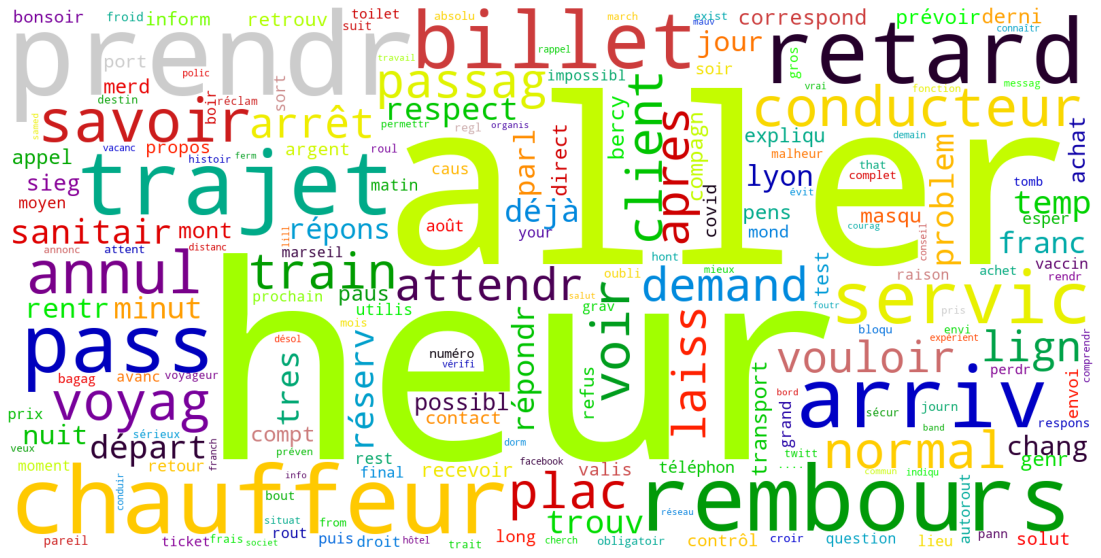

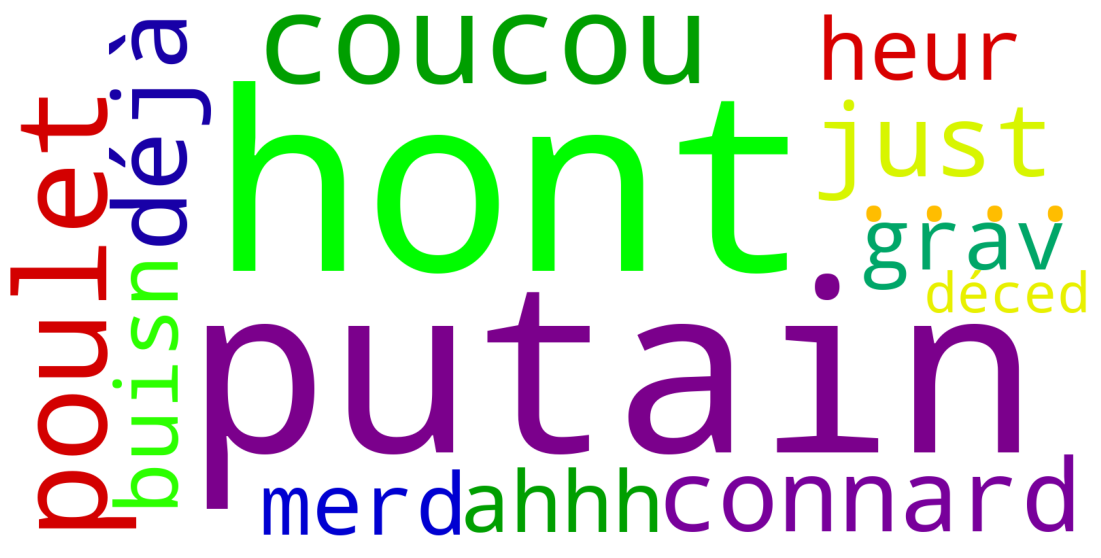

In [72]:
path = 'D:\\Master2 EBDS\\Partie B\\BIG DATA & Marketing\\Ressource NLP Rico Lyon2\\video_Text_Mining_Keras'
for i in tqdm(sorted(set(dataFl.Cluster.tolist()))):
  cluster_texts = dataFl[dataFl['Cluster']==i]['corpus'].tolist()
  frequencies = get_frequencies(cluster_texts)
  wc = generate_wc_cluster(frequencies,i, limit = 2)

In [77]:
clustering = DBSCAN().fit(df_embed.values.astype(float))
dataFl['Cluster'] = clustering.labels_
dataFl['Cluster'].value_counts()

-1     1583
 0      111
 3       21
 11      14
 12      13
 6       11
 5       10
 1        7
 8        7
 2        6
 14       6
 7        6
 9        6
 13       6
 4        5
 10       5
Name: Cluster, dtype: int64

Our observations have been splitted into 20 clusters

In [ ]:
!pip install wordcloud
!pip freeze

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
absl-py==1.3.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.3
aiosignal==1.3.1
alabaster==0.7.12
albumentations==1.2.1
altair==4.2.0
appdirs==1.4.4
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.1.0
audioread==3.0.0
autograd==1.5
Babel==2.11.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.1
blis==0.7.9
bokeh==2.3.3
branca==0.6.0
bs4==0.0.1
CacheControl==0.12.11
cachetools==5.2.0
catalogue==2.0.8
certifi==2022.9.24
cffi==1.15.1
cftime==1.6.2
chardet==3.0.4
charset-normalizer==2.1.1
click==7.1.2
clikit==0.6.2
cloudpickle==1.5.0
cmake==3.22.6
cmdstanpy==1.0.8
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.3
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.2.2
cycler==0.11.0
cymem==2.0.7
Cython==0.29.32
daft==0.0.4
dask==2

Now, we're gonna create a function that will be useful in order to tokenize each word, and then count the number of apparitions of each word/token. The tokenization is done each time that the algorithm meet a whitespace, so each time that a word is ending.

In [51]:
from nltk.tokenize import WhitespaceTokenizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
tk = WhitespaceTokenizer() # one token per word
def get_frequencies(texts):
    all_tokens = []
    for doc in texts:
        all_tokens += tk.tokenize(doc) # we add each new token to a list

    frequencies = Counter(all_tokens) # we count for each token, how many times it appears
    return frequencies

Now we gonna create a wordcloud, similary that what we done before, but this time, with the words generated by the tokenization that we did just before.
Moreover, this function will separate the diffrents wordclouds, one for each cluster.

In [52]:
def generate_wc_cluster(frequencies,cluster_id,limit = 5,font_path=None):
    """
    Generates a WordCloud object from frequencies, after removing words with frequency < 5
    :param frequencies: dict: keys are words, values are frequencies
    :return: WordCloud object
    """
    frequencies = {w: f for w, f in frequencies.items() if f >= limit}
    if len(frequencies) <= 1:
        raise ValueError("Not enough words to plot on the wordcloud : only {} word(s) with frequency >= 5".format(
            len(frequencies)))
    if font_path is not None:
        wc = WordCloud(width=1600, height=800,background_color="white", colormap="nipy_spectral",font_path=font_path)
    else:
        wc = WordCloud(width=1600, height=800,background_color="white", colormap="nipy_spectral")
    wc.generate_from_frequencies(frequencies)
    plt.figure(figsize=(20,10))
    plt.imshow(wc, aspect="equal")
    plt.axis("off")
    #plt.close()
    plt.savefig(path+'wordcloud_{}.jpg'.format(cluster_id))
    
    return wc

We apply this function to each cluster, and we see every time, what are the most common words.

  0%|          | 0/16 [00:00<?, ?it/s]

ValueError: Not enough words to plot on the wordcloud : only 1 word(s) with frequency >= 5

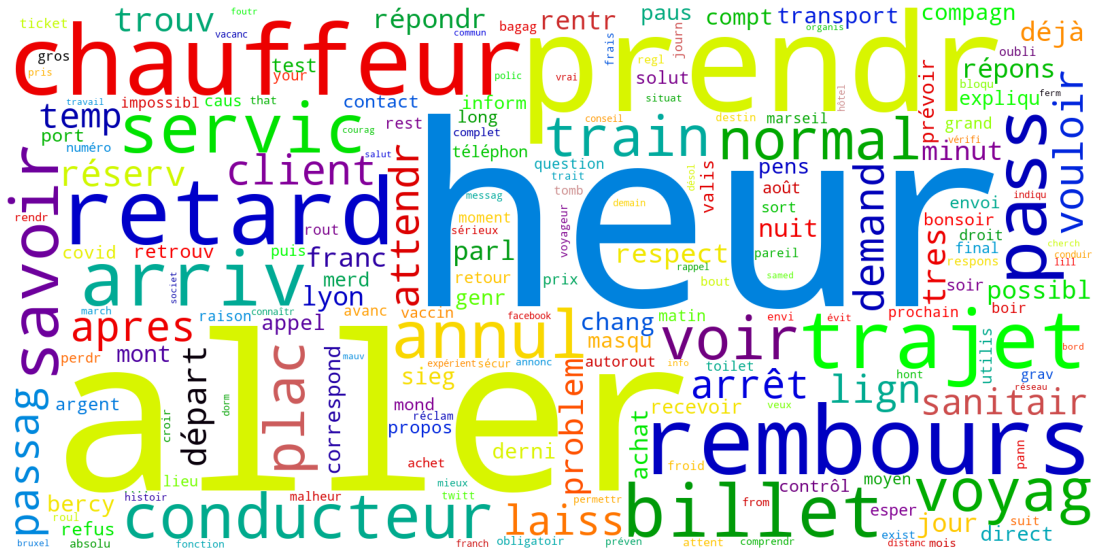

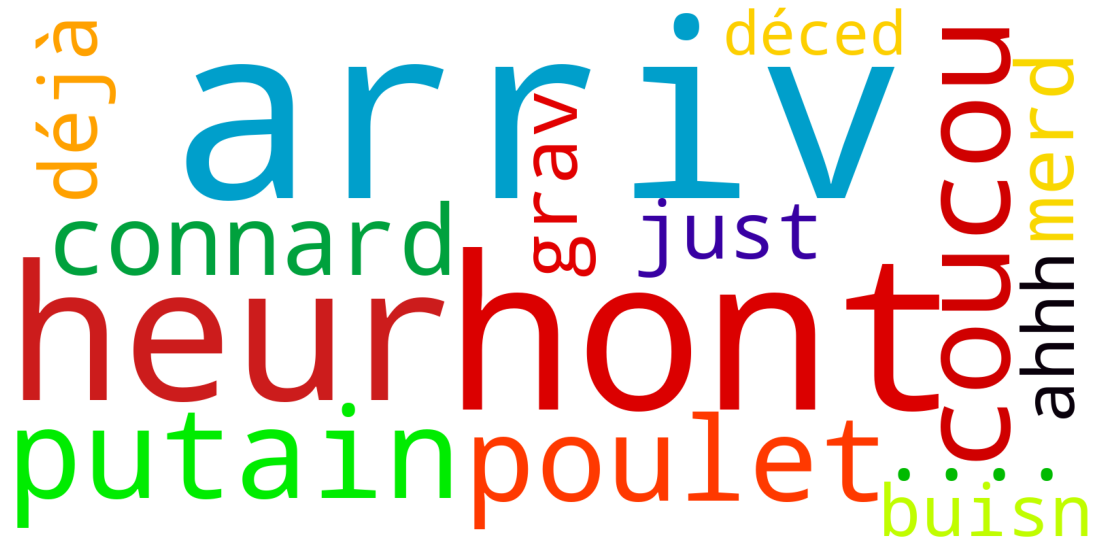

In [78]:
path = 'D:\\Master2 EBDS\\Partie B\\BIG DATA & Marketing\\Ressource NLP Rico Lyon2\\video_Text_Mining_Keras'
for i in tqdm(sorted(set(dataFl.Cluster.tolist()))):
  cluster_texts = dataFl[dataFl['Cluster']==i]['corpus'].tolist()
  frequencies = get_frequencies(cluster_texts)
  wc = generate_wc_cluster(frequencies,i, limit = 2)

In [79]:
dataFl.to_excel('dataFl.xlsx', index = False)


### Blablacar Compagny

We do the same thing for the Blablacar dataset

In [63]:
embeddings = use_vectorize(dataBl['corpus'].astype(str).tolist())
pickle_out = open("embeddings.p","wb")
pickle.dump(embeddings, pickle_out)
pickle_out.close()

Vectorization:   0%|          | 0/1 [00:00<?, ?it/s]

We apply the PCA reduction to our embedded comments

In [64]:
df_embed = pca(embeddings)
df_embed

0         1         2         3         4         5         6   \
0    -0.238628  0.136985  0.182898  0.123383  0.089400  0.100803 -0.240506   
1    -0.401599  0.312818  0.035353 -0.136287 -0.044342 -0.187894  0.025622   
2    -0.043752  0.114058  0.172466 -0.176342  0.065372  0.014055  0.014763   
3    -0.274967  0.098520  0.022527  0.021738  0.177933 -0.014014 -0.154375   
4     0.433448  0.067647 -0.177252 -0.135753  0.027151  0.049872  0.151098   
...        ...       ...       ...       ...       ...       ...       ...   
1302  0.096761  0.037551  0.106238  0.345778  0.309360 -0.106348  0.115720   
1303  0.266705  0.021292  0.175504 -0.018403 -0.220151 -0.155636  0.167458   
1304  0.511005  0.220382 -0.300795 -0.029193 -0.228327  0.114609 -0.093473   
1305  0.451203  0.367640 -0.117246  0.269502  0.111039  0.100189  0.141309   
1306 -0.052227 -0.078408  0.173727  0.189635  0.105166  0.007582 -0.088295   

            7         8         9   ...        40        41        42  \
0     0.040857 -0.063690  0.016315  ...  0.023133 -0.122396 -0.101943   
1    -0.167201 -0.036135 -0.054260  ... -0.042962  0.096883 -0.022510   
2    -0.226465 -0.067880  0.054724  ... -0.067689 -0.064989 -0.023600   
3     0.166893  0.099077 -0.011898  ... -0.072587  0.005866  0.141430   
4     0.058720 -0.075370  0.056395  ...  0.034479  0.005936 -0.051248   
...        ...       ...       ...  ...       ...       ...       ...   
1302  0.029021 -0.070524  0.153799  ... -0.159075  0.023524  0.043924   
1303 -0.095535  0.116263  0.023426  ...  0.136345  0.016970  0.065211   
1304  0.050600  0.037675 -0.039297  ...  0.036024 -0.021158  0.019666   
1305 -0.087943 -0.154050  0.021060  ... -0.056466 -0.043450 -0.127822   
1306 -0.018565  0.125591 -0.124063  ...  0.128082 -0.021987 -0.105979   

            43        44        45        46        47        48        49  
0    -0.080732  0.071787  0.076349 -0.054297 -0.020701 -0.065353 -0.120805  
1     0.033705 -0.074218 -0.001797  0.023207  0.013684 -0.080275  0.129242  
2    -0.022270 -0.103692  0.102706 -0.039101  0.005583  0.131349  0.048639  
3     0.007648  0.041593 -0.068943  0.051959 -0.047703 -0.047931  0.008477  
4    -0.026445  0.045071  0.067504 -0.090867 -0.023908 -0.066719  0.055345  
...        ...       ...       ...       ...       ...       ...       ...  
1302  0.026620 -0.023198  0.013615 -0.118155  0.059582 -0.062287 -0.036127  
1303 -0.038686  0.004278 -0.133582  0.093999 -0.003178  0.025776 -0.093162  
1304  0.075749 -0.075516 -0.057409  0.055924  0.047095 -0.036160 -0.000299  
1305 -0.077400 -0.076433 -0.013657  0.085375 -0.037272 -0.026351  0.062663  
1306  0.010596  0.073452 -0.031855 -0.020351  0.011534 -0.014888  0.123664  

[1307 rows x 50 columns]

In [65]:
clustering = KMeans(n_clusters=20, random_state=20).fit(df_embed.values.astype(float))
dataBl['Cluster'] = clustering.labels_
dataBl['Cluster'].value_counts()

7     105
16    102
6     101
14     98
17     92
12     91
1      85
4      77
9      75
10     72
15     68
3      62
8      55
2      53
18     44
0      37
5      34
11     24
19     19
13     13
Name: Cluster, dtype: int64

  0%|          | 0/20 [00:00<?, ?it/s]

FileNotFoundError: [Errno 2] No such file or directory: '/content/wordcloud_0.jpg'

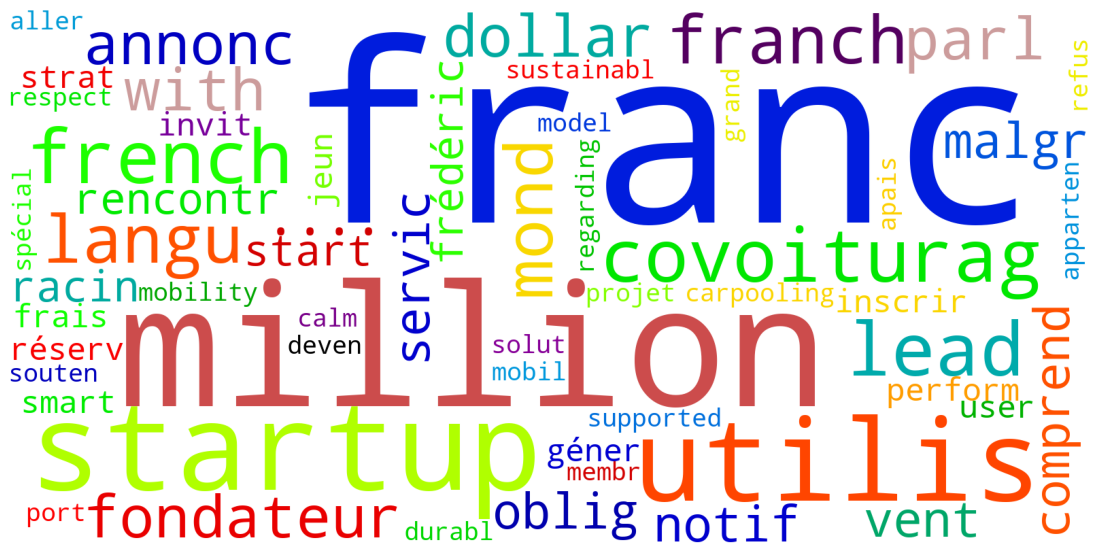

In [66]:
path = '/content/'
for i in tqdm(sorted(set(dataBl.Cluster.tolist()))):
  cluster_texts = dataBl[dataBl['Cluster']==i]['corpus'].tolist()
  frequencies = get_frequencies(cluster_texts)
  wc = generate_wc_cluster(frequencies,i, limit = 2)

# Results of our sentiment analysis 
it emerges from our analysis of the opinions of our customers more negative opinions in certain cluster than other neutral and positive.

Indeed, there are several times the presence of words such as cancel, refund, driver, Service, Delay, Time, Sanitary, Vaccine, Time.

The presence of vaccine and sanitary tells us that it was during the health crisis, which is why these negative opinions concerned the behavior of drivers, disruptions, the fact that the buses were late and that there were controls for the health pass. We can also say that it is because of the delays and others that the customers asked for refunds of their tickets


This study allows us to propose to our company (Flixbus) to train the drivers on how to improve their contact with the customers, to respect the schedules posted in station, also improved 


At our competitors (BlaBlaCar) also, as it was the same period (health crisis), there were also the same negative opinions but not in the same proportion, the users asked for refunds, delays of buses.

### Member of group:
### BAH JURY THIERNO MAMADOU
### GILLAND KILLIAN
### MARREL ADRIEN